In [166]:
import os
import re
import pickle
from pathlib import Path
import yaml

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy
import pandas as pd
import torch
import tifffile
from sklearn.metrics import adjusted_rand_score
from einops import rearrange, repeat

In [55]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [19]:
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils
import mushroom.data.datasets as datasets
import mushroom.data.visium as visium
import mushroom.data.xenium as xenium
import mushroom.data.multiplex as multiplex
import mushroom.data.he as he
import mushroom.registration.bigwarp as bigwarp
from mushroom.mushroom import Mushroom

In [6]:
project_dir = '/data/estorrs/mushroom/data/projects/submission_v1'
case = 'HT413C1-Th1k4A1'
output_dir = os.path.join(project_dir, 'analysis', case)
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [7]:
output_dir

'/data/estorrs/mushroom/data/projects/submission_v1/analysis/HT413C1-Th1k4A1'

In [28]:
def alter_filesystem(config, source_root, target_root):
    for entry in config['sections']:
        for mapping in entry['data']:
            mapping['filepath'] = mapping['filepath'].replace(source_root, target_root)
    
    if 'trainer_kwargs' in config and config['trainer_kwargs']['data_mask'] is not None:
        config['trainer_kwargs']['data_mask'] = config['trainer_kwargs']['data_mask'].replace(source_root, target_root)
        
    return config

In [23]:
source_root = '/diskmnt/Projects/Users/estorrs/mushroom/data'
target_root = '/data/estorrs/mushroom/data'

In [8]:
## needs to be mushroom_50res_infigure now because you reran if you want to have initial results in fig 3
outputs = pickle.load(open(os.path.join(project_dir, case, 'mushroom_50res', 'outputs.pkl'), 'rb'))
outputs.keys()

dict_keys(['section_positions', 'section_ids', 'dtype_to_volume', 'dtype_to_volume_probs', 'dtype_to_clusters', 'dtype_to_cluster_probs', 'dtype_to_cluster_probs_all', 'dtype_to_cluster_intensities', 'dtype_to_cluster_to_agg'])

In [9]:
outputs['dtype_to_clusters'].keys()

dict_keys(['integrated', 'cosmx', 'he', 'multiplex', 'xenium'])

In [10]:
mushroom = Mushroom.from_config(os.path.join(project_dir, case, 'mushroom_50res'), accelerator='cpu')

INFO:root:loading spore for cosmx
INFO:root:data mask detected
INFO:root:starting cosmx processing
INFO:root:using 1000 channels
INFO:root:2 sections detected: ['HT413C1-Th1k4A1-U7', 'HT413C1-Th1k4A1-U34']
INFO:root:processing sections
INFO:root:generating image data for section HT413C1-Th1k4A1-U7
INFO:root:generating image data for section HT413C1-Th1k4A1-U34
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 2 sections detected: [('HT413C1-Th1k4A1-U7', 'cosmx'), ('HT413C1-Th1k4A1-U34', 'cosmx')]
INFO:root:creating data loaders
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp4w7ualby
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp4w7ualby/_remote_module_non_scriptable.py
INFO:root:creating ViT


cosmx torch.Size([1000, 102, 73])


INFO:root:model initialized
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/mushroom_50res/cosmx_chkpts/last-v1.ckpt
INFO:root:loading spore for he
INFO:root:data mask detected
INFO:root:starting he processing
INFO:root:14 sections detected: ['HT413C1-Th1k4A1-U14', 'HT413C1-Th1k4A1-U18', 'HT413C1-Th1k4A1-U1', 'HT413C1-Th1k4A1-U4', 'HT413C1-Th1k4A1-U8', 'HT413C1-Th1k4A1-U11', 'HT413C1-Th1k4A1-U21', 'HT413C1-Th1k4A1-U24', 'HT413C1-Th1k4A1-U27', 'HT413C1-Th1k4A1-U29', 'HT413C1-Th1k4A1-U30', 'HT413C1-Th1k4A1-U35', 'HT413C1-Th1k4A1-U38', 'HT413C1-Th1k4A1-U40']
INFO:root:processing sections
INFO:root:genera

0.02


INFO:root:generating image data for section HT413C1-Th1k4A1-U18
INFO:root:generating image data for section HT413C1-Th1k4A1-U1
INFO:root:generating image data for section HT413C1-Th1k4A1-U4
INFO:root:generating image data for section HT413C1-Th1k4A1-U8
INFO:root:generating image data for section HT413C1-Th1k4A1-U11
INFO:root:generating image data for section HT413C1-Th1k4A1-U21
INFO:root:generating image data for section HT413C1-Th1k4A1-U24
INFO:root:generating image data for section HT413C1-Th1k4A1-U27
INFO:root:generating image data for section HT413C1-Th1k4A1-U29
INFO:root:generating image data for section HT413C1-Th1k4A1-U30
INFO:root:generating image data for section HT413C1-Th1k4A1-U35
INFO:root:generating image data for section HT413C1-Th1k4A1-U38
INFO:root:generating image data for section HT413C1-Th1k4A1-U40
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 14 sections detected: [('HT413C1-Th1k4A1-U14', 'he'), ('HT413C1-Th1k4A1-U18

he torch.Size([3, 101, 72])


INFO:root:loading spore for multiplex
INFO:root:data mask detected
INFO:root:starting multiplex processing
INFO:root:using 27 channels
INFO:root:7 sections detected: ['HT413C1-Th1k4A1-U20', 'HT413C1-Th1k4A1-U3', 'HT413C1-Th1k4A1-U26', 'HT413C1-Th1k4A1-U32', 'HT413C1-Th1k4A1-U37', 'HT413C1-Th1k4A1-U41', 'HT413C1-Th1k4A1-U42']
INFO:root:processing sections
INFO:root:generating image data for section HT413C1-Th1k4A1-U20


0.02


INFO:root:generating image data for section HT413C1-Th1k4A1-U3
INFO:root:generating image data for section HT413C1-Th1k4A1-U26
INFO:root:generating image data for section HT413C1-Th1k4A1-U32
INFO:root:generating image data for section HT413C1-Th1k4A1-U37
INFO:root:generating image data for section HT413C1-Th1k4A1-U41
INFO:root:generating image data for section HT413C1-Th1k4A1-U42
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 7 sections detected: [('HT413C1-Th1k4A1-U20', 'multiplex'), ('HT413C1-Th1k4A1-U3', 'multiplex'), ('HT413C1-Th1k4A1-U26', 'multiplex'), ('HT413C1-Th1k4A1-U32', 'multiplex'), ('HT413C1-Th1k4A1-U37', 'multiplex'), ('HT413C1-Th1k4A1-U41', 'multiplex'), ('HT413C1-Th1k4A1-U42', 'multiplex')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPU

multiplex torch.Size([27, 101, 72])


INFO:root:loading spore for xenium
INFO:root:data mask detected
INFO:root:starting xenium processing
INFO:root:using 477 channels
INFO:root:5 sections detected: ['HT413C1-Th1k4A1-U19', 'HT413C1-Th1k4A1-U2', 'HT413C1-Th1k4A1-U9', 'HT413C1-Th1k4A1-U25', 'HT413C1-Th1k4A1-U36']
INFO:root:processing sections
INFO:root:generating image data for section HT413C1-Th1k4A1-U19
INFO:root:generating image data for section HT413C1-Th1k4A1-U2
INFO:root:generating image data for section HT413C1-Th1k4A1-U9
INFO:root:generating image data for section HT413C1-Th1k4A1-U25
INFO:root:generating image data for section HT413C1-Th1k4A1-U36
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 5 sections detected: [('HT413C1-Th1k4A1-U19', 'xenium'), ('HT413C1-Th1k4A1-U2', 'xenium'), ('HT413C1-Th1k4A1-U9', 'xenium'), ('HT413C1-Th1k4A1-U25', 'xenium'), ('HT413C1-Th1k4A1-U36', 'xenium')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU

xenium torch.Size([477, 102, 73])


INFO:root:chkpt files detected, embedding to spores
INFO:root:embedding cosmx spore
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

INFO:root:embedding he spore


Predicting: |                                                                                                 …

INFO:root:embedding multiplex spore


Predicting: |                                                                                                 …

INFO:root:embedding xenium spore


Predicting: |                                                                                                 …

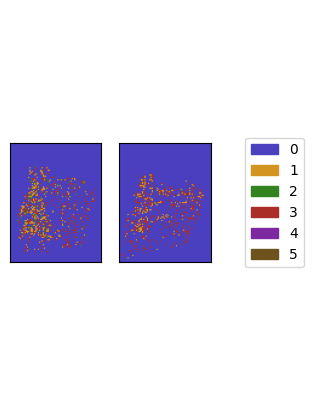

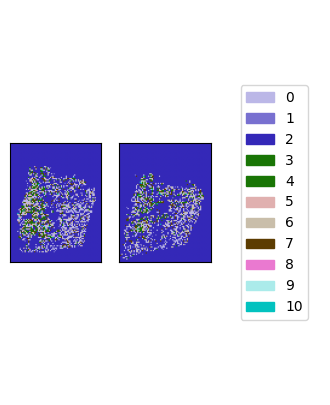

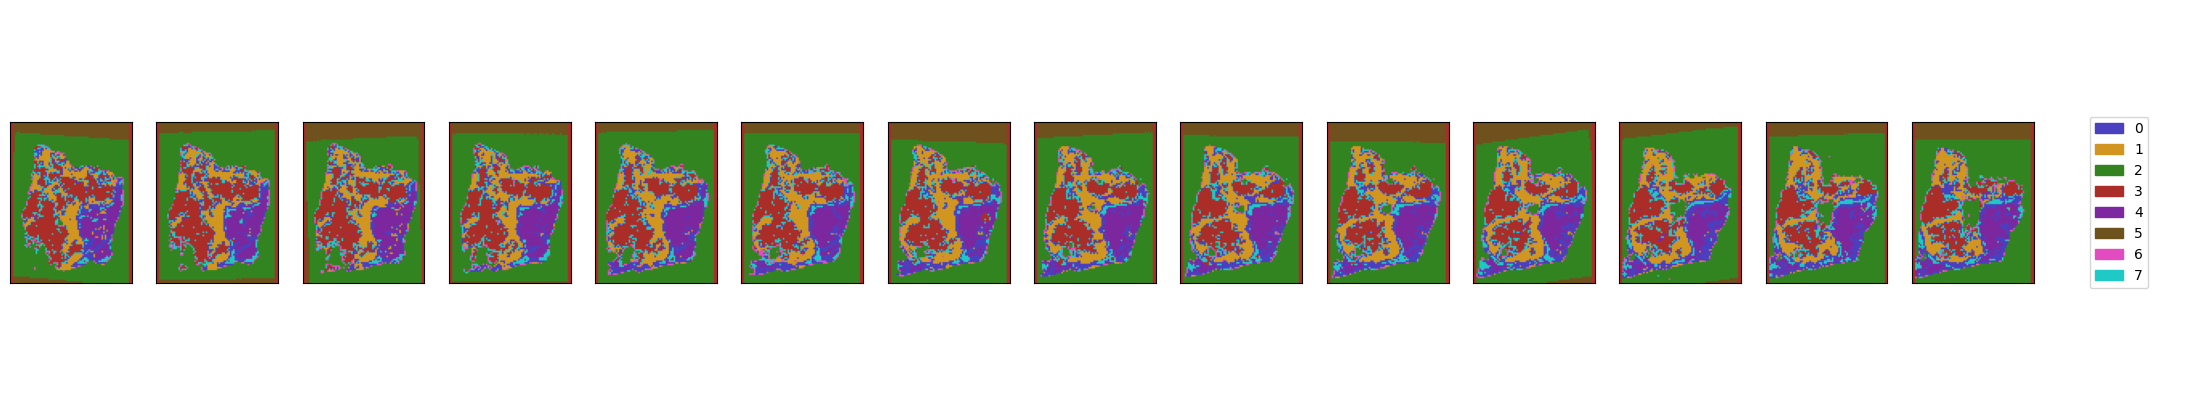

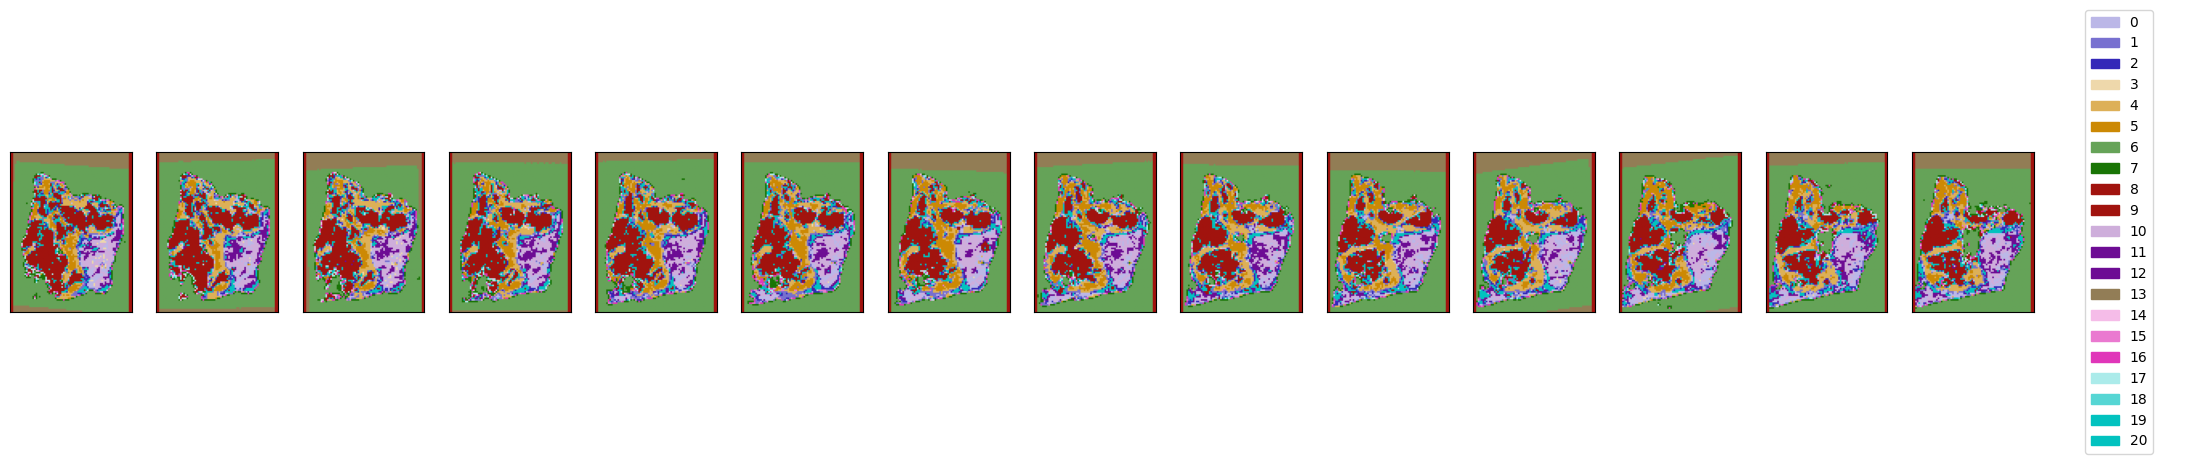

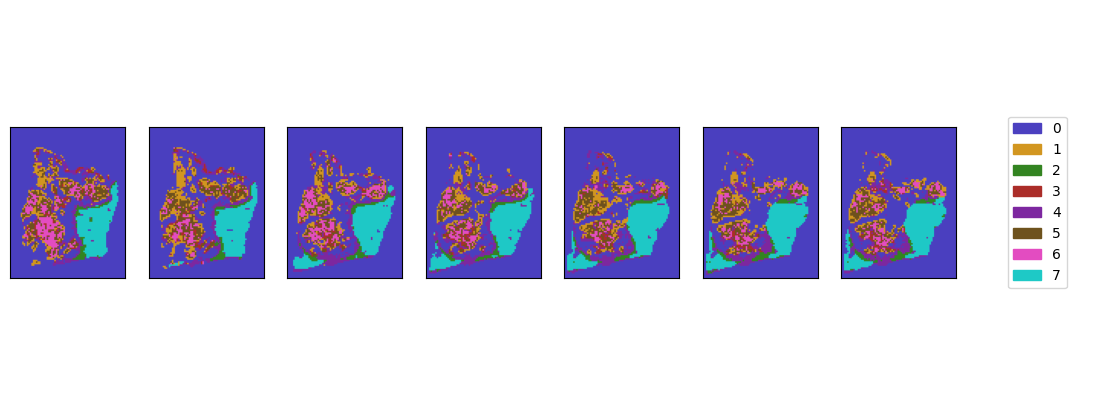

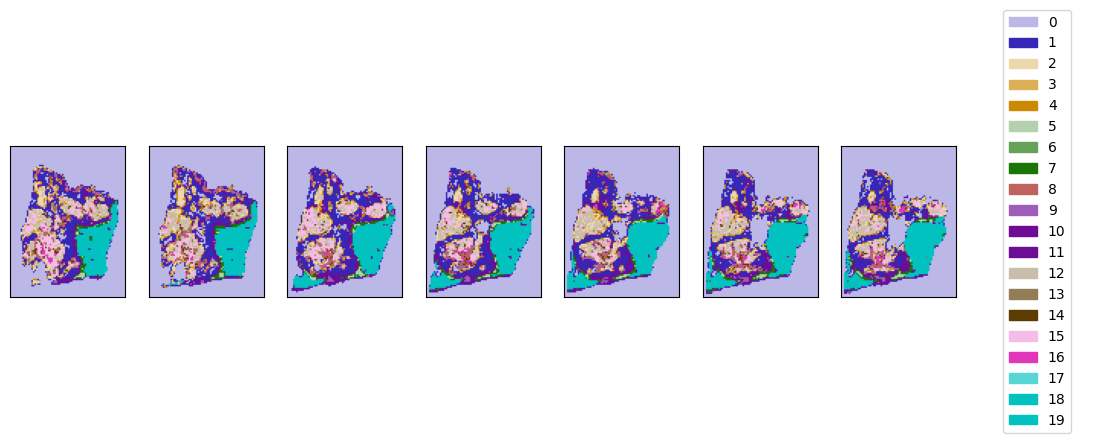

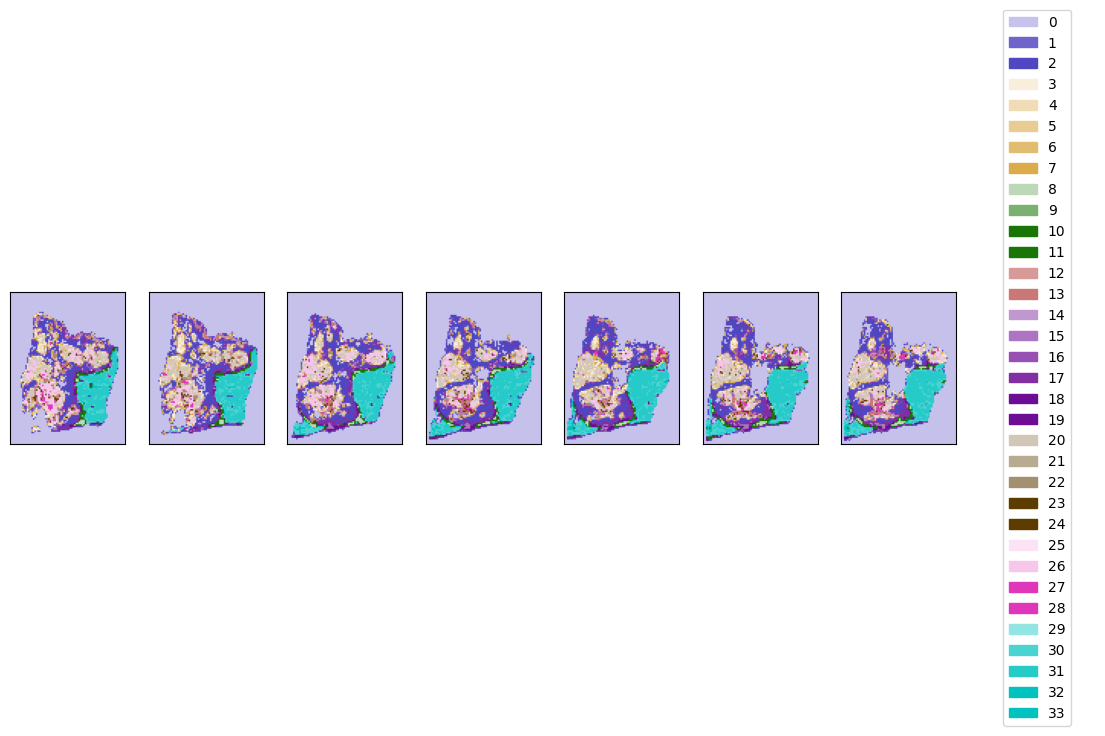

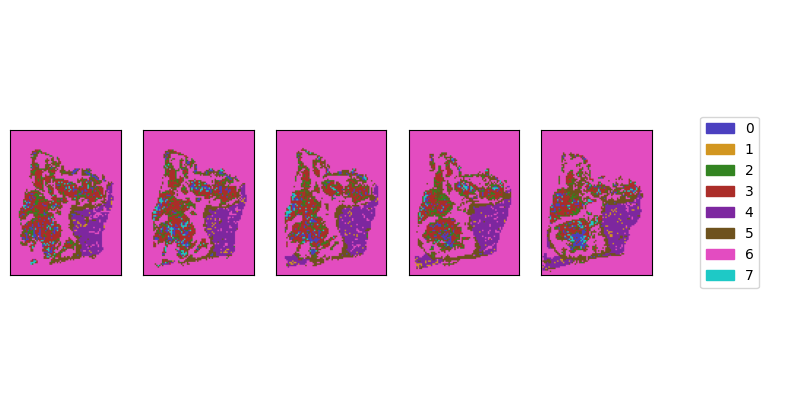

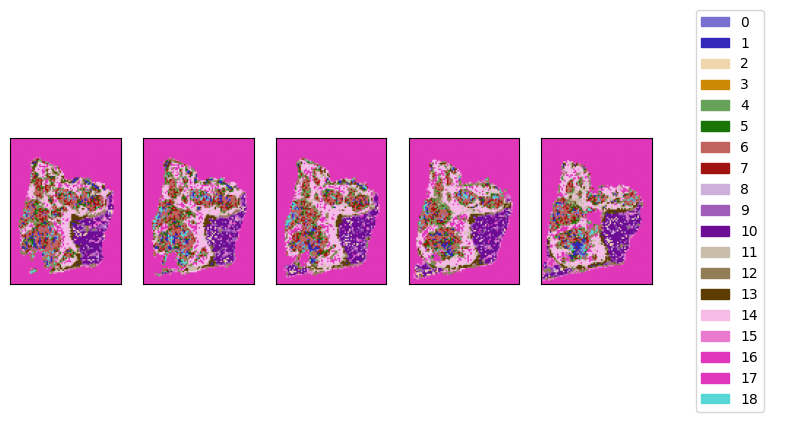

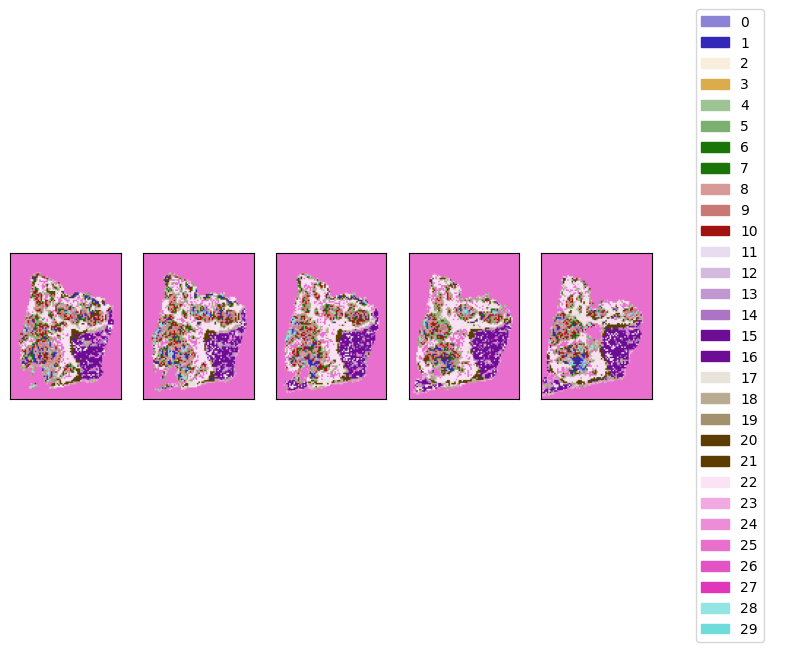

In [12]:
for dtype in mushroom.dtypes:
    for level in range(mushroom.num_levels):
        mushroom.display_clusters(dtype, level=level)
        plt.show()

###### sections for Fig 3.

HT413C1-Th1k4A1-U14 he
HT413C1-Th1k4A1-U18 he
HT413C1-Th1k4A1-U19 xenium
HT413C1-Th1k4A1-U20 multiplex
HT413C1-Th1k4A1-U1 he
HT413C1-Th1k4A1-U2 xenium
HT413C1-Th1k4A1-U3 multiplex
HT413C1-Th1k4A1-U4 he
HT413C1-Th1k4A1-U7 cosmx
HT413C1-Th1k4A1-U8 he
HT413C1-Th1k4A1-U9 xenium
HT413C1-Th1k4A1-U11 he
HT413C1-Th1k4A1-U21 he
HT413C1-Th1k4A1-U24 he
HT413C1-Th1k4A1-U25 xenium
HT413C1-Th1k4A1-U26 multiplex
HT413C1-Th1k4A1-U27 he
HT413C1-Th1k4A1-U29 he
HT413C1-Th1k4A1-U30 he
HT413C1-Th1k4A1-U31 xenium
HT413C1-Th1k4A1-U32 multiplex
HT413C1-Th1k4A1-U34 cosmx
HT413C1-Th1k4A1-U35 he
HT413C1-Th1k4A1-U36 xenium
HT413C1-Th1k4A1-U37 multiplex
HT413C1-Th1k4A1-U38 he
HT413C1-Th1k4A1-U40 he
HT413C1-Th1k4A1-U41 multiplex
HT413C1-Th1k4A1-U42 multiplex


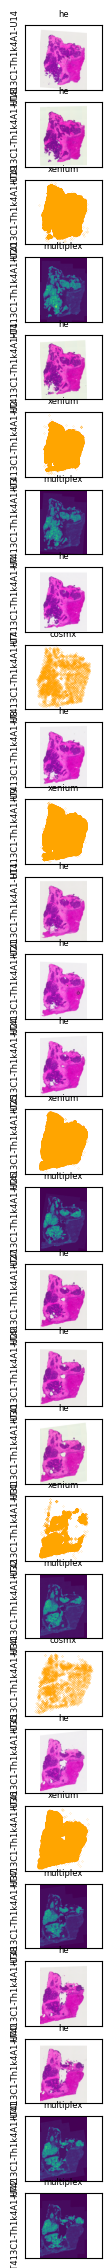

In [29]:
metadata = yaml.safe_load(open(os.path.join(project_dir, case, 'registered', 'metadata.yaml')))

metadata = alter_filesystem(metadata, source_root, target_root)

bigwarp.display_data_map(metadata)

In [30]:
metadata

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s0_HT413C1-Th1k4A1-U14_he.tif'}],
   'position': 0,
   'sid': 'HT413C1-Th1k4A1-U14'},
  {'data': [{'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s1_HT413C1-Th1k4A1-U18_he.tif'}],
   'position': 20,
   'sid': 'HT413C1-Th1k4A1-U18'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s2_HT413C1-Th1k4A1-U19_xenium.h5ad'}],
   'position': 25,
   'sid': 'HT413C1-Th1k4A1-U19'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s3_HT413C1-Th1k4A1-U20_multiplex.ome.tiff'}],
   'position': 30,
   'sid': 'HT413C1-Th1k4A1-U20'},
  {'data': [{'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/

In [42]:
spore.clusters[0][0].shape

(100, 76)

In [46]:
img.dtype

dtype('uint8')

In [384]:
def plot_panel_b_sections(img, sid, dtype):
    nrows, ncols = 1, mushroom.num_levels + 1
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2, nrows * 2))
    for i, ax in enumerate(axs):
        if i == 0:
            ax.imshow(img)
            ax.set_title(dtype)
            ax.set_ylabel(sid)
        else:
            level = i - 1
            rgb = vis_utils.display_labeled_as_rgb(
                spore.clusters[level][spore.section_ids.index((sid, dtype))],
                label_to_hierarchy=spore.cluster_to_agg[level])
            ax.imshow(rgb)
            ax.set_title(f'Level {level}')

        ax.set_xticks([])
        ax.set_yticks([])

def save_legend():
    n_clusters = mushroom.sae_kwargs['num_clusters']

    aggs = np.asarray(list(spore.cluster_to_agg[-1].values()))
    cmaps = [vis_utils.get_hierarchical_cmap(spore.cluster_to_agg[i]) for i in range(mushroom.num_levels)]
    agg_to_cluster = [{v:k for k, v in x.items()} for x in spore.cluster_to_agg]

    blocks = np.zeros((mushroom.num_levels, 1000), dtype=int)

    labels = np.unique(aggs[:, 0])
    step_size = blocks.shape[1] // len(labels)
    for i, label in enumerate(labels):
        block = blocks[:, i * step_size:(i + 1) * step_size]
        block[0] = label

        filtered_aggs = aggs[aggs[:, 0] == label]

        for level in range(1, mushroom.num_levels):
            ff_aggs = np.unique(filtered_aggs[:, :level + 1], axis=0)
            level_step_size = (block.shape[1] // len(ff_aggs))


            for j, agg in enumerate(ff_aggs):
                block[level, j * level_step_size:(j + 1) * level_step_size] = agg_to_cluster[level][tuple(agg)]
    
    rgb_blocks = np.zeros((blocks.shape[0], blocks.shape[1], 3))
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            rgb_blocks[i, j] = cmaps[i][blocks[i, j]]
            
    for level, (rgb_row, row) in enumerate(zip(rgb_blocks, blocks)):
        rgb_row = np.expand_dims(rgb_row, axis=0)
        ticks, spaces = [], []
        current, space = 0, 0
        for i, label in enumerate(row):
            if label == current:
                ticks.append(i)
                current += 1

        rgb_row = repeat(rgb_row, '1 n c -> z n c', z=20)
        plt.imshow(rgb_row)
        plt.xticks(ticks, np.unique(row), rotation=90)
        plt.yticks([])
#         plt.savefig(os.path.join(output_dir, f'{dtype}_selected_section_legend_l{level}.svg'), dpi=300)



In [385]:
sid, dtype = 'HT413C1-Th1k4A1-U29', 'he'
spore = mushroom.dtype_to_spore[dtype]
for entry in metadata['sections']:
    if entry['sid'] == sid:
        for mapping in entry['data']:
            if mapping['dtype'] == dtype:
                fp = mapping['filepath']
img = tifffile.imread(fp)

upscale=10.
target_size = [int(x * upscale) for x in spore.clusters[0][0].shape]
img = utils.rescale(img, size=target_size, dim_order='h w c')

img.shape


(1000, 760, 3)

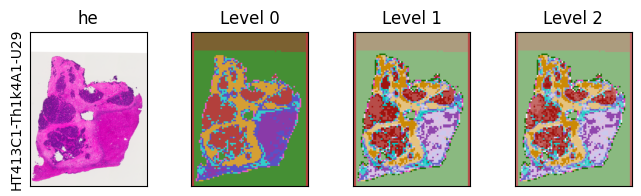

In [386]:
plot_panel_b_sections(img, sid, dtype)
# plt.savefig(os.path.join(output_dir, f'{dtype}_selected_section.svg'), dpi=300)

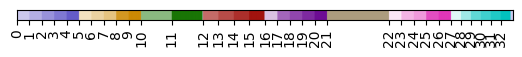

In [387]:
save_legend()

In [388]:
spore.cluster_to_agg[2]

{0: (0, 0, 1),
 1: (0, 1, 0),
 2: (0, 1, 1),
 3: (0, 2, 0),
 4: (0, 2, 1),
 5: (1, 0, 1),
 6: (1, 1, 0),
 7: (1, 1, 1),
 8: (1, 3, 0),
 9: (1, 3, 1),
 10: (2, 1, 1),
 11: (2, 3, 1),
 12: (3, 2, 0),
 13: (3, 2, 1),
 14: (3, 3, 0),
 15: (3, 3, 1),
 16: (4, 0, 1),
 17: (4, 2, 0),
 18: (4, 2, 1),
 19: (4, 3, 0),
 20: (4, 3, 1),
 21: (5, 1, 1),
 22: (6, 0, 0),
 23: (6, 1, 0),
 24: (6, 1, 1),
 25: (6, 3, 0),
 26: (6, 3, 1),
 27: (7, 0, 0),
 28: (7, 1, 0),
 29: (7, 2, 0),
 30: (7, 2, 1),
 31: (7, 3, 0),
 32: (7, 3, 1)}

In [222]:
sid, dtype = 'HT413C1-Th1k4A1-U36', 'xenium'
spore = mushroom.dtype_to_spore[dtype]
for entry in metadata['sections']:
    if entry['sid'] == sid:
        for mapping in entry['data']:
            if mapping['dtype'] == dtype:
                fp = mapping['filepath']
print(fp)

adata = xenium.adata_from_xenium(fp, normalize=True)
exp_img = xenium.to_multiplex(adata, tiling_size=16)
contrast_mapping = {
    'EPCAM': 90.,
    'PTPRC': 90.,
    'VIM': 80.,
    'ACTA2': 90.,
#     'VIM': 80.,
}
cmap = {
    'EPCAM': (1., 0., 0.),
    'PTPRC': (0., 1., 0.),
    'VIM': (1., 1., 1.),
    'ACTA2': (0., 0., 1.),
    
}
channel_to_img = {c:exp_img[..., i] for i, c in enumerate(adata.var.index.to_list()) if c in contrast_mapping}

img = multiplex.make_pseudo(channel_to_img, cmap=cmap, contrast_mapping=contrast_mapping)

upscale=10.
target_size = [int(x * upscale) for x in spore.clusters[0][0].shape]
img = utils.rescale(img, size=target_size, dim_order='h w c')

img.shape

(1000, 760, 3)

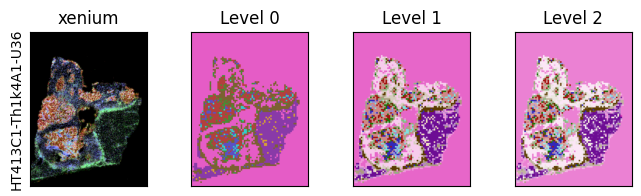

In [224]:
plot_panel_b_sections(img, sid, dtype)
plt.savefig(os.path.join(output_dir, f'{dtype}_selected_section.svg'), dpi=300)

In [225]:
save_legend()

In [226]:
output_dir

'/data/estorrs/mushroom/data/projects/submission_v1/analysis/HT413C1-Th1k4A1'

In [233]:
sid, dtype = 'HT413C1-Th1k4A1-U32', 'multiplex'
spore = mushroom.dtype_to_spore[dtype]
for entry in metadata['sections']:
    if entry['sid'] == sid:
        for mapping in entry['data']:
            if mapping['dtype'] == dtype:
                fp = mapping['filepath']
print(fp)
print(multiplex.get_ome_tiff_channels(fp))

# adata = xenium.adata_from_xenium(fp, normalize=True)
# exp_img = xenium.to_multiplex(adata, tiling_size=16)
contrast_mapping = {
    'PanCytokeratin': 95.,
    'CD3e (D)': 80.,
    'HLA-DR': 80.,
    'SMA (D)': 80.,
#     'VIM': 80.,
}
cmap = {
    'PanCytokeratin': (1., 0., 0.),
    'CD3e (D)': (0., 1., 0.),
    'HLA-DR': (1., 1., 1.),
    'SMA (D)': (0., 0., 1.),
    
}
# channel_to_img = {c:exp_img[..., i] for i, c in enumerate(adata.var.index.to_list()) if c in contrast_mapping}
channel_to_img = multiplex.extract_ome_tiff(fp, channels=list(contrast_mapping.keys()))

img = multiplex.make_pseudo(channel_to_img, cmap=cmap, contrast_mapping=contrast_mapping)

upscale=10.
target_size = [int(x * upscale) for x in spore.clusters[0][0].shape]
img = utils.rescale(img, size=target_size, dim_order='h w c')

img.shape

/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s20_HT413C1-Th1k4A1-U32_multiplex.ome.tiff
['DAPI', 'Podoplanin', 'PanCytokeratin', 'HLA-DR', 'CD8', 'SMA (D)', 'CD45', 'Ki67', 'Hep-Par-1 (D)', 'GLUT1 (D)', 'CK14', 'CD31', 'CCL2', 'E-cadherin', 'MUC2', 'CD11b', 'SOX9', 'CD20 (D)', 'FoxP3', 'P21 (D)', 'CK7', 'CD68 (D)', 'P16 (Dnew)', 'CD4 (D)', 'PAI1 (D)', 'CD3e (D)', 'CK8/18']


(1000, 760, 3)

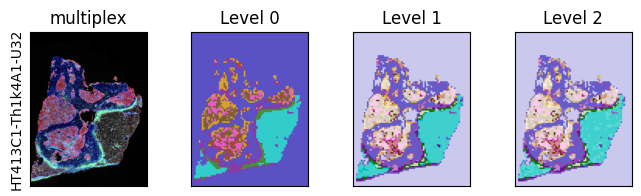

In [235]:
plot_panel_b_sections(img, sid, dtype)
plt.savefig(os.path.join(output_dir, f'{dtype}_selected_section.svg'), dpi=300)

In [236]:
save_legend()

#### projection dtype panels

In [432]:
nbhd_volumes = pickle.load(open(os.path.join(project_dir, case, 'mushroom_50res_infigure', 'nbhd_volumes_l2.pkl'), 'rb'))
nbhd_volumes.keys()

dict_keys(['probs', 'labeled'])

In [433]:
nbhd_volumes['labeled'].keys()

dict_keys(['cosmx', 'he', 'multiplex', 'xenium'])

In [434]:
dtype_to_df = mushroom.calculate_cluster_intensities(
    projection_dtype='xenium', dtype_to_volume=nbhd_volumes['labeled']
)
dtype_to_df.keys()

dict_keys(['cosmx', 'he', 'multiplex', 'xenium'])

In [435]:
proj_dtype_to_dfs = {}
for dtype in mushroom.dtypes:
    proj_dtype_to_dfs[dtype] = mushroom.calculate_cluster_intensities(
        projection_dtype=dtype, dtype_to_volume=nbhd_volumes['labeled']
    )

In [436]:
dtype_to_weight = {
    'he': 1.,
    'cosmx': 0.,
    'multiplex': 1.,
    'xenium': 1.
}
dtype_to_volume = mushroom.generate_interpolated_volumes(
    z_scaler=.2, dtype_to_weight=dtype_to_weight, integrate=True, level=2, resolution=2.
)

proj_dtype_to_dfs['integrated'] = mushroom.calculate_cluster_intensities(
    projection_dtype='integrated', dtype_to_volume=dtype_to_volume
)

In [437]:
'SERPINA6' in dtype_to_df['xenium'].columns

False

/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. 

he xenium
he multiplex
multiplex xenium
multiplex multiplex
xenium xenium
xenium multiplex
integrated xenium
integrated multiplex


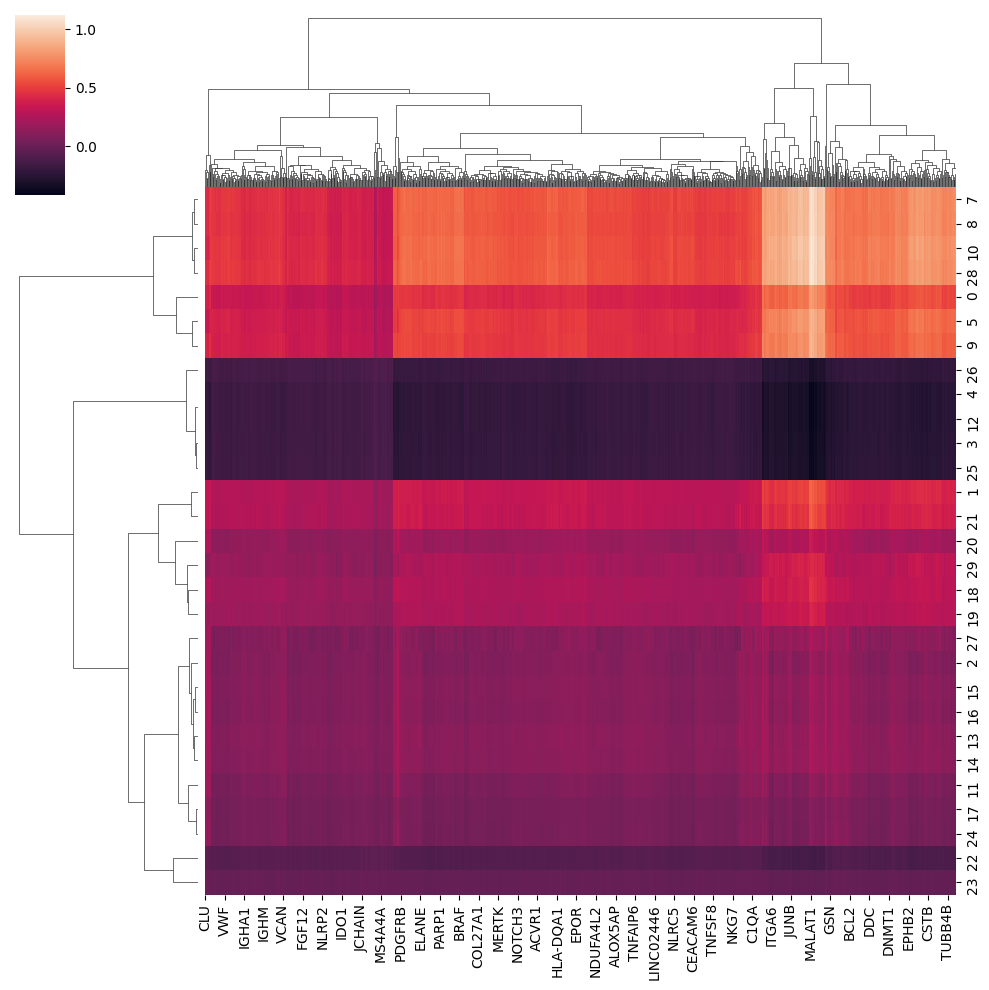

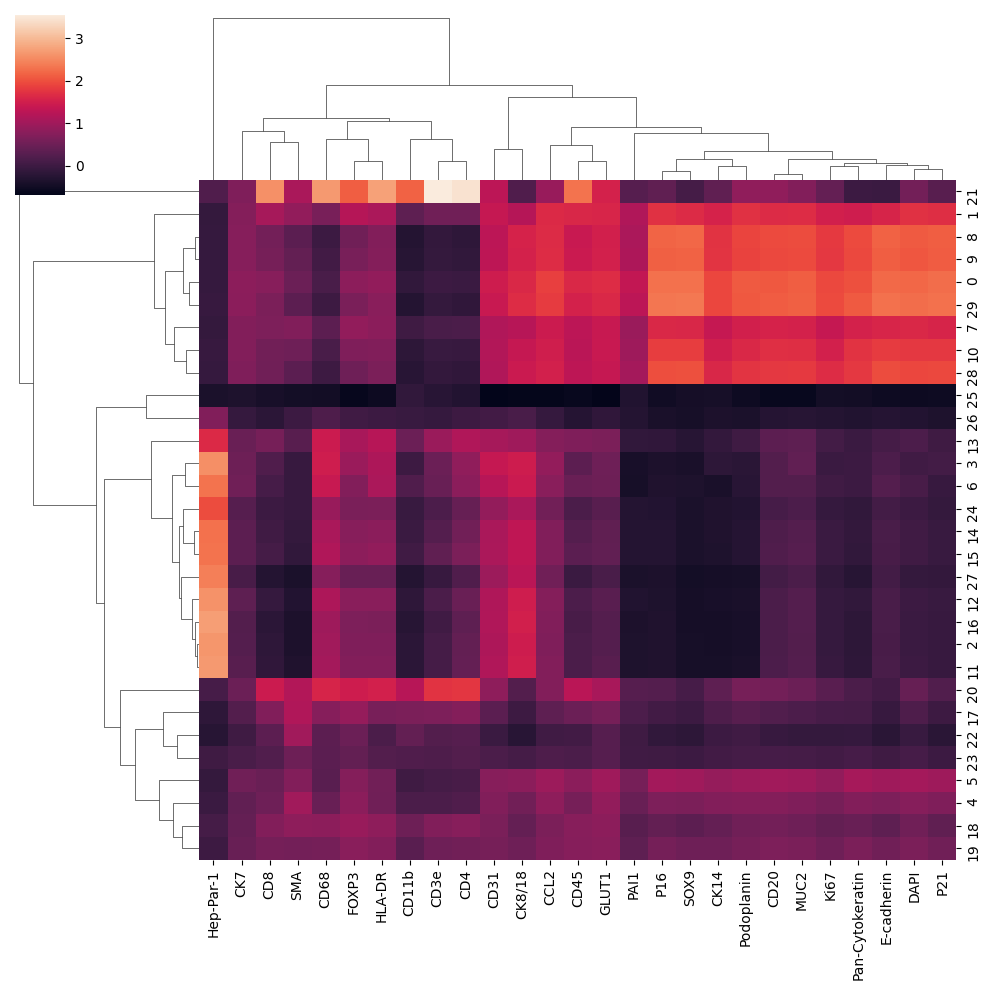

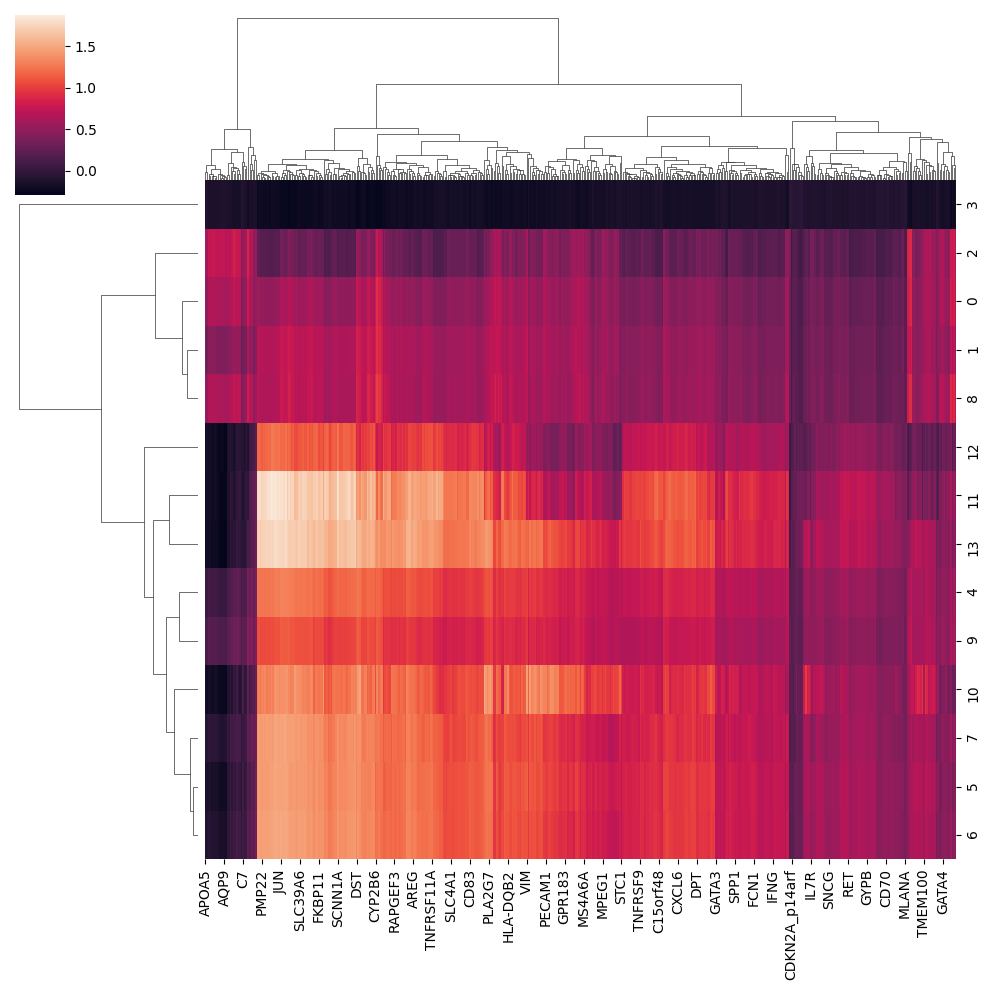

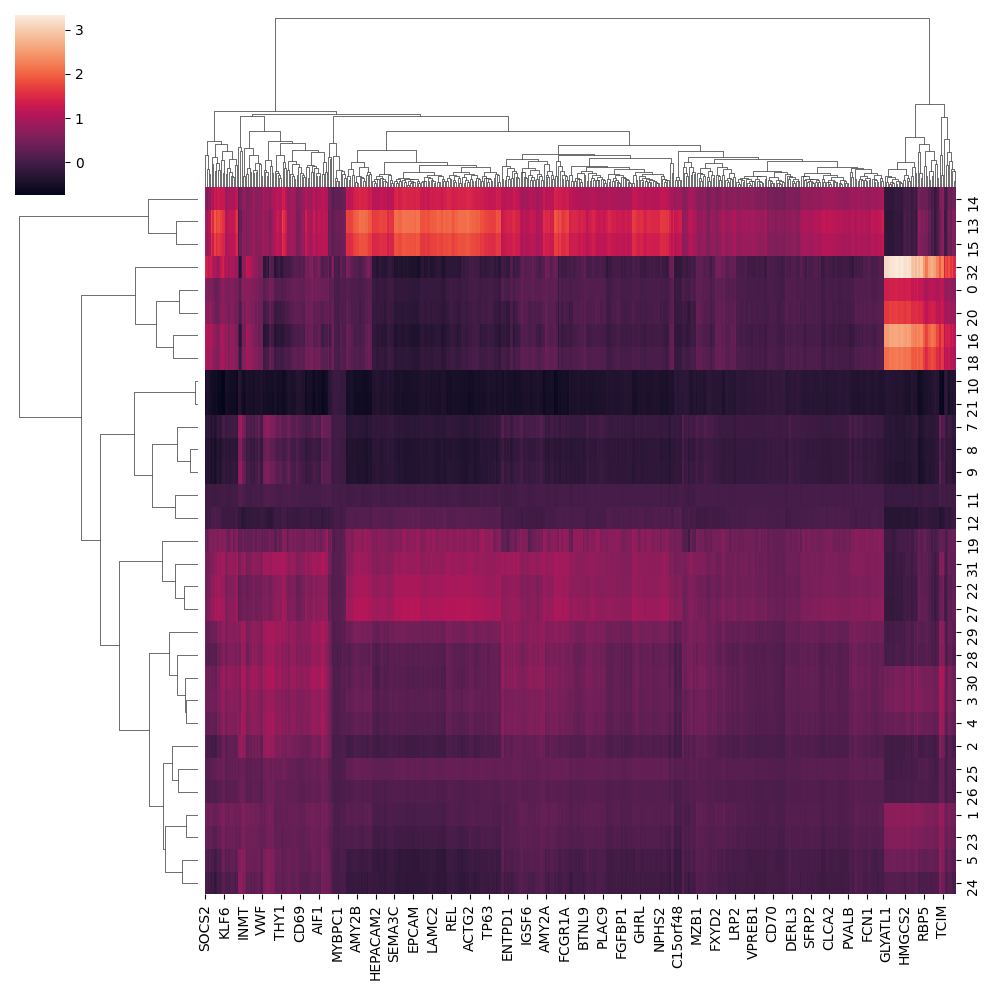

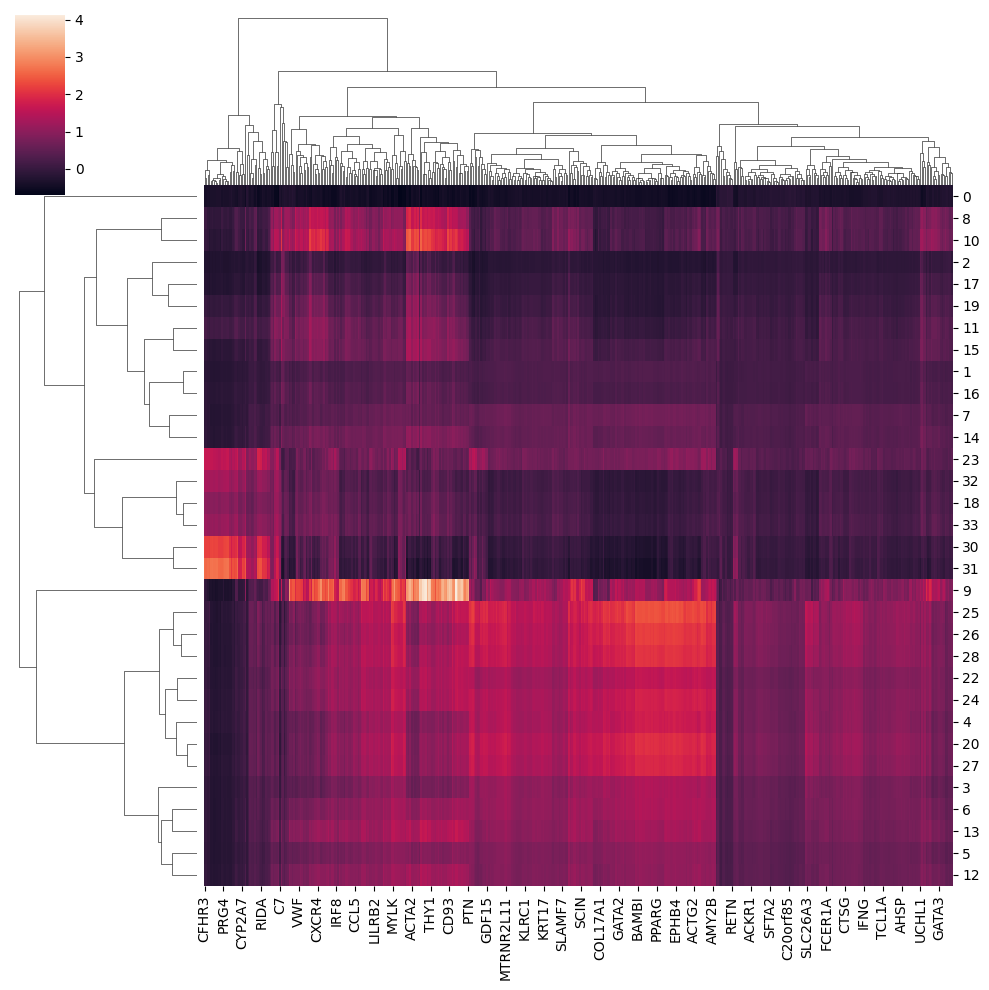

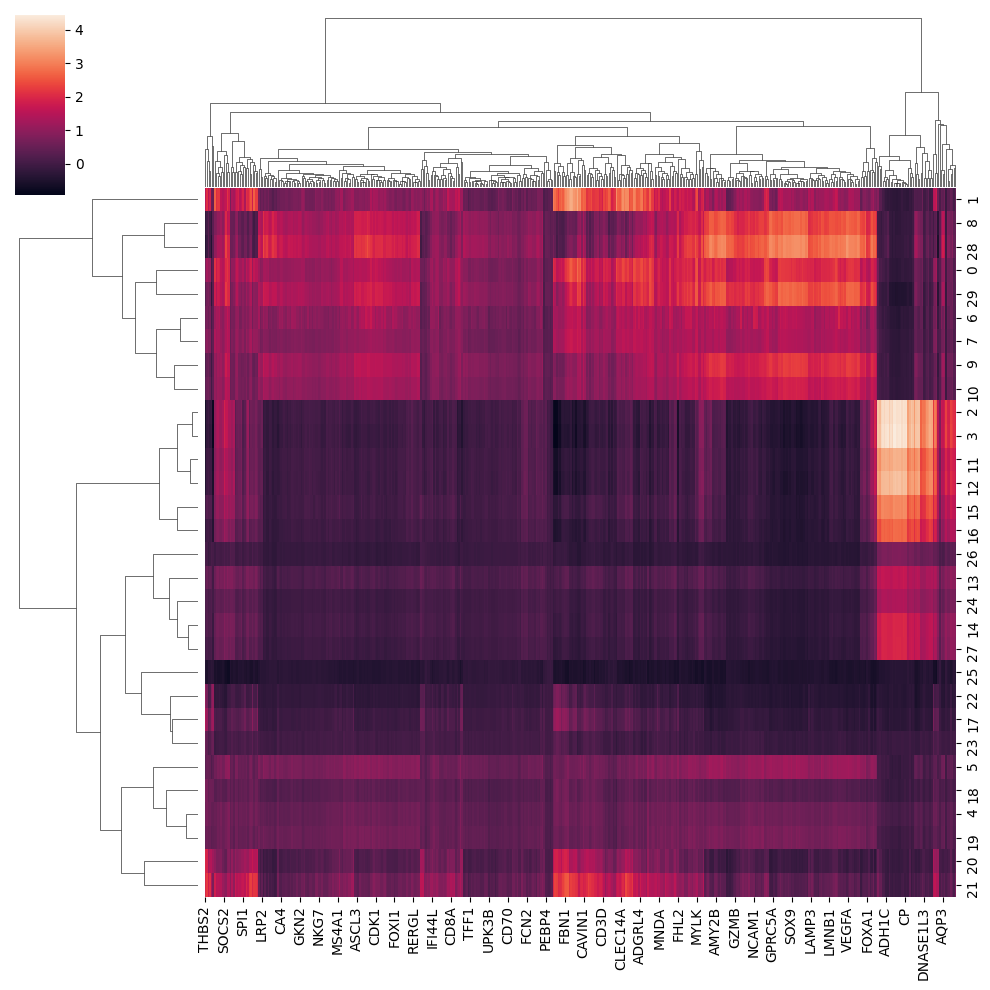

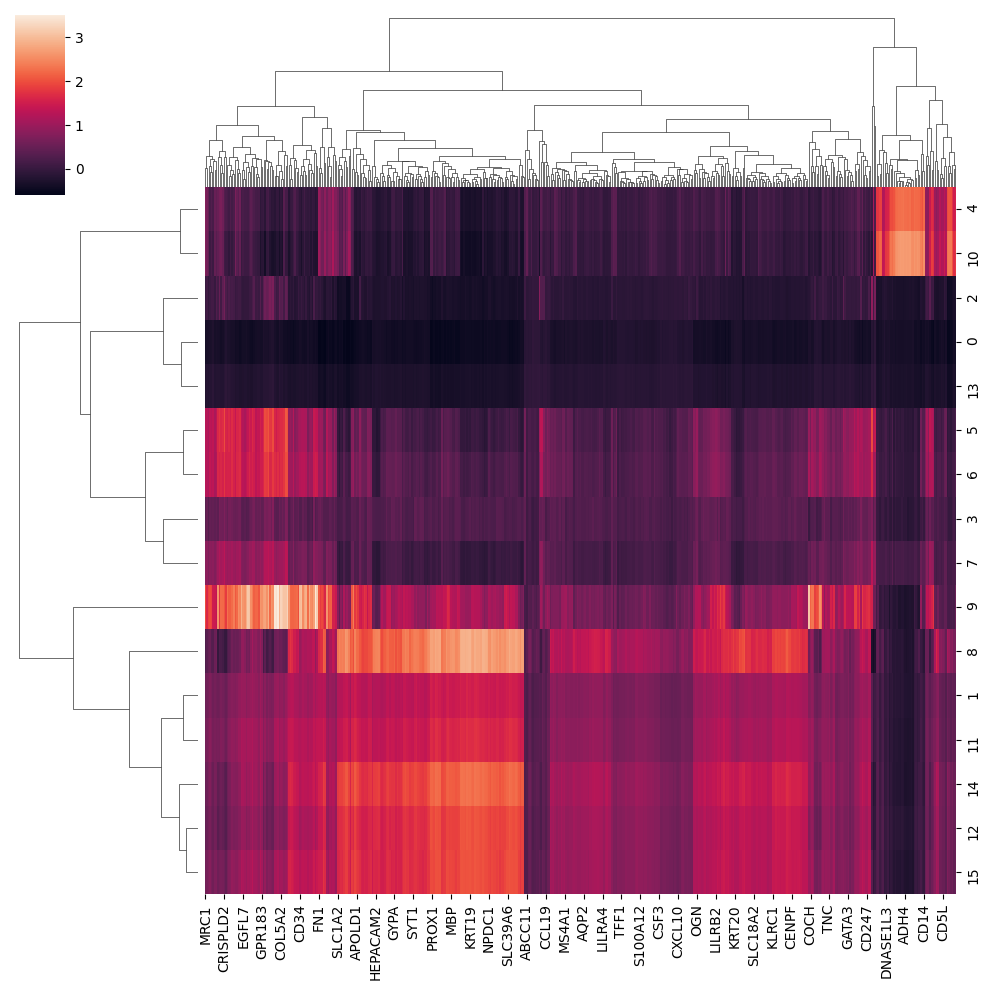

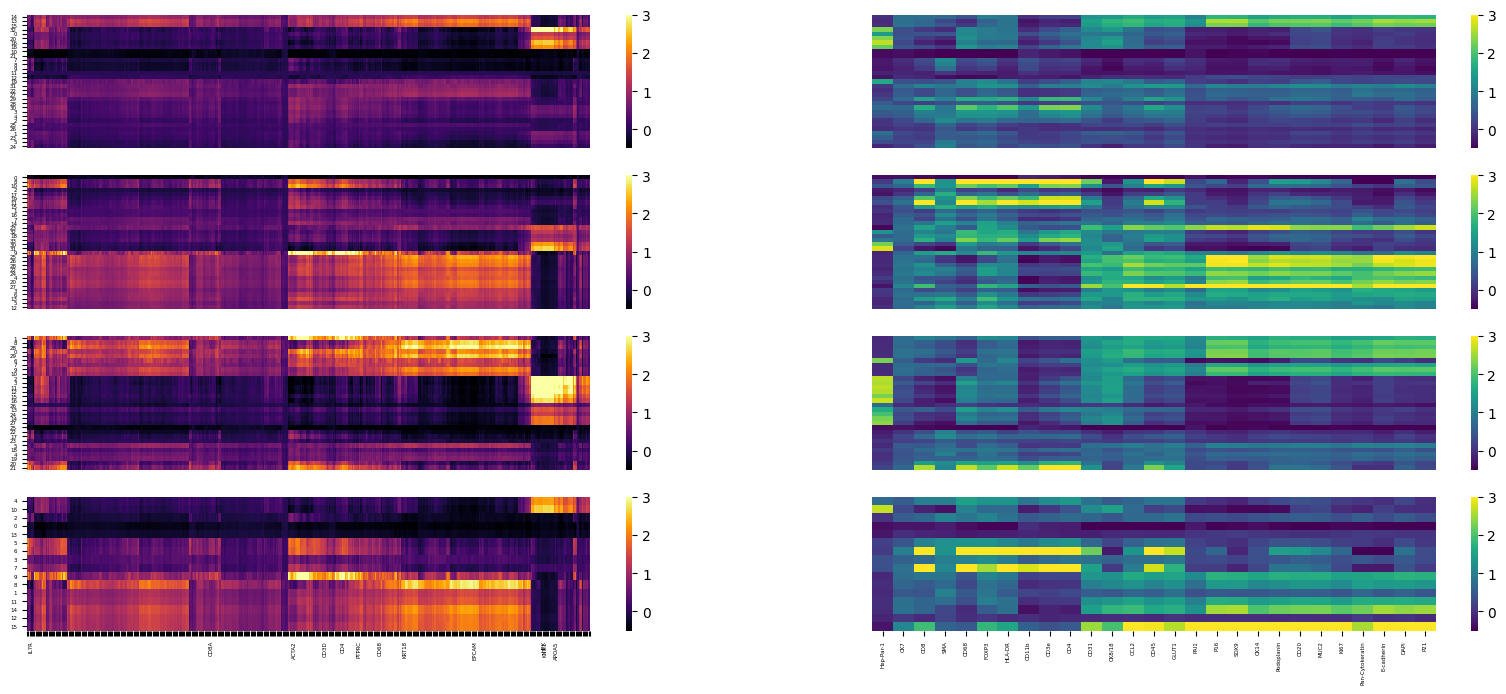

In [438]:
dtype_to_order = {dtype:df.columns[sns.clustermap(df).dendrogram_col.reordered_ind]
                 for dtype, df in dtype_to_df.items()}

proj_to_nbhd_order = {dtype:mapping['xenium'].index[sns.clustermap(mapping['xenium']).dendrogram_row.reordered_ind].to_list()
                           for dtype, mapping in proj_dtype_to_dfs.items()}
# proj_to_nbhd_order = {dtype:mapping['xenium'].index.to_list()
#                            for dtype, mapping in proj_dtype_to_dfs.items()}

proj_dtype_order = ['he', 'multiplex', 'xenium', 'integrated']
dtype_order = ['xenium', 'multiplex']
dtype_to_cmap = {
    'xenium': 'inferno',
    'multiplex': 'viridis',
}

show_feats = [
    'EPCAM', 'HPX', 'APOA5', 'KNG1', 'HLA-DBQ2', 'ACTA2', 'CD3D', 'CD4', 'IL7R', 'CD8A', 'PTPRC', 'CD68', 'KRT18'
]

nrows, ncols = len(proj_dtype_order), len(dtype_order)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 10, nrows * 2))
for i, proj_dtype in enumerate(proj_dtype_order):
    for j, dtype in enumerate(dtype_order):
        print(proj_dtype, dtype)
        cbar = True
        ax = axs[i, j]
        df = proj_dtype_to_dfs[proj_dtype][dtype]
        nbhds, feats = proj_to_nbhd_order[proj_dtype], dtype_to_order[dtype]
        df = df.loc[nbhds, feats]
        
        if dtype == 'xenium':
            sns.heatmap(
                data=df, ax=ax, cbar=cbar,
                xticklabels=[x if x in show_feats else '' for x in feats], yticklabels=True,
                cmap=dtype_to_cmap[dtype], vmin=-.5, vmax=3., rasterized=True
            )
        else:
            sns.heatmap(
                data=df, ax=ax, cbar=cbar,
                xticklabels=True, yticklabels=True,
                cmap=dtype_to_cmap[dtype], vmin=-.5, vmax=3., rasterized=True
            )
        ax.tick_params(axis='x', labelsize=4, rotation=90)
        ax.tick_params(axis='y', labelsize=4, rotation=0)
        
        if i < len(proj_dtype_order) - 1:
            ax.set_xticks([])
        if j != 0:
            ax.set_yticks([])
plt.savefig(os.path.join(output_dir, f'projection_heatmaps.svg'), dpi=300)
        

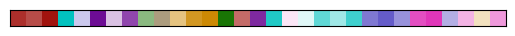

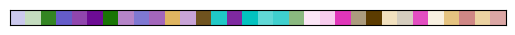

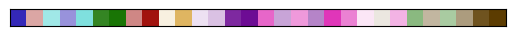

In [421]:
# scaler = 10
for dtype in proj_dtype_order:
    to_color = vis_utils.get_hierarchical_cmap(mushroom.dtype_to_spore[dtype].cluster_to_agg[2])
    order = proj_to_nbhd_order[dtype]
    blocks = np.zeros((1, len(order), 3))
    for i, label in enumerate(order):
        blocks[0, i] = to_color[label]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(blocks)
    plt.savefig(os.path.join(output_dir, f'projection_heatmaps_nbhd_legend_{dtype}.svg'), dpi=300)
    plt.show()

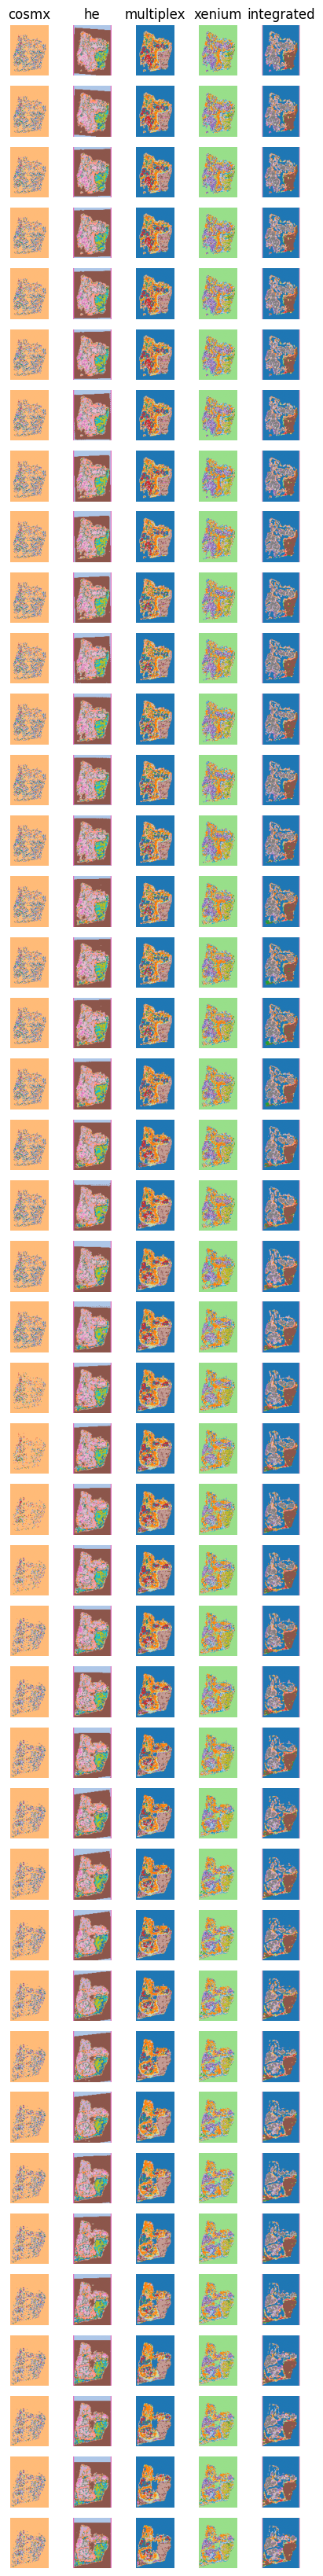

In [440]:
mushroom.display_volumes()

In [443]:
pickle.dump(dtype_to_volume['integrated'], open('/data/estorrs/sandbox/integrated.pkl', 'wb'))

In [427]:
outputs = pickle.load(open(os.path.join(project_dir, case, 'mushroom_50res_infigure', 'outputs.pkl'), 'rb'))

dict_keys(['cosmx', 'he', 'multiplex', 'xenium'])

In [256]:
dtype_to_df['xenium']

ABCC11      ACAN      ACE2     ACKR1     ACTA2     ACTG2    ADAM28  \
0   0.309391  0.486094  1.243876  0.910088  0.427680  2.242195  0.900093   
1   0.280215  0.488499  1.079411  0.807637  0.498483  1.978691  0.890887   
2   0.396280  0.485041  1.614565  1.126553  0.253342  2.746187  0.864223   
3   0.374066  0.274649  1.493597  1.068878  0.080768  2.503498  0.731208   
4   0.363094  0.246573  1.454339  1.043134  0.056877  2.455876  0.708953   
5   0.177472  0.190284  0.457777  0.449677  0.397233  0.781794  0.592727   
6   0.199959  0.281016  0.603871  0.527973  0.462210  1.079331  0.682878   
7   0.192018  0.105219  0.132087  0.231132  0.429599  0.182161  0.488134   
8   0.032355  0.152852  0.004820  0.128246  0.744287  0.109273  0.613566   
9   0.104672  0.551487  0.125814  0.313054  1.337329  0.447610  1.233405   
10  0.115251  0.443053  0.007225  0.168095  1.359730  0.174387  1.110732   
11  0.076617  0.130705  0.157828  0.270313  0.476271  0.334065  0.558663   
12  0.053756  0.125417  0.116431  0.225230  0.527443  0.276483  0.549644   
13 -0.116296 -0.103492 -0.189862 -0.145126  0.483847 -0.288222  0.126830   
14 -0.148997 -0.203918 -0.278453 -0.251092 -0.061365 -0.482503 -0.251993   
15 -0.056250  0.024229 -0.089634  0.011533  0.697915 -0.051107  0.419189   
16 -0.158401 -0.235871 -0.335476 -0.298416 -0.456060 -0.582618 -0.475848   
17  0.217476 -0.066289  0.087613  0.130115  0.088128 -0.094181  0.109949   
18  0.015892 -0.118563 -0.064907  0.010411  0.135102 -0.159002  0.068130   
19 -0.149519 -0.231074 -0.317493 -0.279311 -0.379688 -0.556668 -0.427041   
20  0.059423  0.028956  0.073469  0.176709  0.330172  0.140540  0.371883   
21  0.488845  0.095039  0.215449  0.315538  0.198883  0.095371  0.368102   
22  0.597800 -0.043502  0.289982  0.203714 -0.076876 -0.057916  0.059371   
23  0.435071 -0.096381  0.229450  0.173498 -0.141098 -0.103860 -0.017052   
24  0.520468 -0.093601  0.273224  0.174396 -0.173388 -0.109650 -0.056269   
25  0.485377 -0.124457  0.271899  0.159876 -0.244620 -0.142099 -0.122525   
26  0.355069 -0.110519  0.172390  0.147791 -0.118635 -0.146330 -0.020312   
27  0.431326 -0.153421  0.238137  0.119590 -0.290084 -0.188033 -0.193076   
28  0.222811  0.985441  0.827185  0.679107  1.213096  1.870141  1.310377   
29  0.227841  0.720625  0.789582  0.661237  0.867401  1.627924  1.057934   
30  0.345667  0.946327  1.502625  1.041063  0.890510  2.872529  1.284407   
31  0.145668  1.264628  0.346876  0.492402  2.017386  1.143492  1.815437   
32  0.126453  2.096336  0.427108  0.481310  2.870273  1.711516  2.298469   
33  0.668786 -0.067025  0.347349  0.197075 -0.238011 -0.055995 -0.071065   

     ADAMTS1    ADGRE1    ADGRL4  ...     UCHL1      UMOD     UPK3B      VCAN  \
0   0.260516  1.147569  1.193225  ...  0.765451  0.934727  0.746060  0.379408   
1   0.352070  1.028939  1.137846  ...  0.738555  0.801637  0.659629  0.472385   
2   0.068050  1.373764  1.334464  ...  0.825580  1.167732  0.874039  0.094631   
3  -0.094571  1.270666  1.053801  ...  0.760639  1.079866  0.841219  0.057581   
4  -0.116017  1.233308  1.009093  ...  0.739859  1.044915  0.838340  0.053997   
5   0.346981  0.586083  0.529752  ...  0.545702  0.407570  0.230189  0.595384   
6   0.364345  0.688060  0.698666  ...  0.597168  0.496913  0.332068  0.596822   
7   0.541797  0.271549  0.316676  ...  0.441175  0.137932  0.033265  0.630844   
8   0.659565  0.197501  0.354260  ...  0.691151  0.064599  0.017979  1.132789   
9   1.363683  0.471931  1.000665  ...  0.937327  0.196000  0.086534  1.664142   
10  1.421427  0.273223  0.824021  ...  1.004245  0.049246  0.033360  1.734916   
11  0.416117  0.374371  0.383135  ...  0.595375  0.212971  0.054366  0.837881   
12  0.451516  0.315957  0.355170  ...  0.605006  0.171041  0.048153  0.892211   
13  0.178108 -0.157656 -0.157203  ...  0.550642 -0.149520 -0.101704  0.932414   
14 -0.226203 -0.301552 -0.407420  ...  0.019043 -0.214002 -0.158079  0.130452   
15  0.477689  0.041912  0.144324  ...  0.690506 -

In [262]:
gs_table = pd.read_csv(
    os.path.join(project_dir, 'analysis', 'gene_sets', 'PanglaoDB_markers_27_Mar_2020.tsv'), sep='\t')
gs_table = gs_table[[True if not pd.isnull(x) and 'Hs' in x else False for x in gs_table['species']]]
gs_table = gs_table[gs_table['organ']=='Immune system']
gs_table

species official gene symbol           cell type            nicknames  \
421    Mm Hs                  CD2             B cells                  NaN   
422    Mm Hs                  CD5             B cells                  NaN   
423    Mm Hs                MS4A1             B cells      Bp35|MS4A2|CD20   
424    Mm Hs                  CR2             B cells            CD21|C3DR   
425    Mm Hs                 CD22             B cells     SIGLEC-2|SIGLEC2   
...      ...                  ...                 ...                  ...   
8024   Mm Hs                 IL10  T regulatory cells     CSIF|IL10A|IL-10   
8025   Mm Hs                IL1R1  T regulatory cells  D2S1473|CD121A|IL1R   
8026   Mm Hs                ITGB8  T regulatory cells                  NaN   
8027   Mm Hs               LRRC32  T regulatory cells             D11S833E   
8028   Mm Hs                FOLR1  T regulatory cells                 FOLR   

      ubiquitousness index                product description  \
421                  0.040                       CD2 molecule   
422                  0.004                       CD5 molecule   
423                  0.014     membrane spanning 4-domains A1   
424                  0.001          complement C3d receptor 2   
425                  0.003                      CD22 molecule   
...                    ...                                ...   
8024                 0.001                     interleukin 10   
8025                 0.008      interleukin 1 receptor type 1   
8026                 0.031            integrin subunit beta 8   
8027                 0.007  leucine rich repeat containing 32   
8028                 0.017                  folate receptor 1   

                gene type  canonical marker germ layer          organ  \
421   protein-coding gene               NaN   Mesoderm  Immune system   
422   protein-coding gene               1.0   Mesoderm  Immune system   
423   protein-coding gene               1.0   Mesoderm  Immune system   
424   protein-coding gene               1.0   Mesoderm  Immune system   
425   protein-coding gene               1.0   Mesoderm  Immune system   
...                   ...               ...        ...            ...   
8024  protein-coding gene               1.0   Mesoderm  Immune system   
8025  protein-coding gene               1.0   Mesoderm  Immune system   
8026  protein-coding gene               1.0   Mesoderm  Immune system   
8027  protein-coding gene               1.0   Mesoderm  Immune system   
8028  protein-coding gene               1.0   Mesoderm  Immune system   

      sensitivity_human  sensitivity_mouse  specificity_human  \
421            0.000000           0.213178           0.095847   
422            0.000000           0.000000           0.004153   
423            0.483871           0.620155           0.011182   
424            0.048387           0.034884           0.000000   
425            0.096774           0.127907           0.001278   
...                 ...                ...                ...   
8024           0.000000           0.000000           0.000000   
8025           0.000000           0.000000           0.019110   
8026           0.000000           0.000000           0.116855   
8027           0.000000           0.000000           0.011591   
8028           0.000000           0.000000           0.009399   

      specificity_mouse  
421            0.026554  
422            0.004502  
423            0.001566  
424            0.000000  
425            0.000196  
...                 ...  
8024           0.001283  
8025           0.006353  
8026           0.013605  
8027           0.006866  
8028           0.019765  

[1541 rows x 14 columns]

In [270]:
genes = sorted(set(gs_table['official gene symbol']))
len(genes)

971

In [277]:
# hallmark immune response dbsig
genes = """ABCA1,ABI1,ACVR1B,ACVR2A,ADM,ADORA2B,ADRM1,AHR,APLNR,AQP9,ATP2A2,ATP2B1,ATP2C1,AXL,BDKRB1,BEST1,BST2,BTG2,C3AR1,C5AR1,CALCRL,CCL17,CCL2,CCL20,CCL22,CCL24,CCL5,CCL7,CCR7,CCRL2,CD14,CD40,CD48,CD55,CD69,CD70,CD82,CDKN1A,CHST2,CLEC5A,CMKLR1,CSF1,CSF3,CSF3R,CX3CL1,CXCL10,CXCL11,CXCL6,CXCL9,CXCR6,CYBB,DCBLD2,EBI3,EDN1,EIF2AK2,EMP3,EMR1,EREG,F3,FFAR2,FPR1,FZD5,GABBR1,GCH1,GNA15,GNAI3,GP1BA,GPC3,GPR132,GPR183,HAS2,HBEGF,HIF1A,HPN,HRH1,ICAM1,ICAM4,ICOSLG,IFITM1,IFNAR1,IFNGR2,IL10,IL10RA,IL12B,IL15,IL15RA,IL18,IL18R1,IL18RAP,IL1A,IL1B,IL1R1,IL2RB,IL4R,IL6,IL7R,IL8,INHBA,IRAK2,IRF1,IRF7,ITGA5,ITGB3,ITGB8,KCNA3,KCNJ2,KCNMB2,KIF1B,KLF6,LAMP3,LCK,LCP2,LDLR,LIF,LPAR1,LTA,LY6E,LYN,MARCO,MEFV,MEP1A,MET,MMP14,MSR1,MXD1,MYC,NAMPT,NDP,NFKB1,NFKBIA,NLRP3,NMI,NMUR1,NOD2,NPFFR2,OLR1,OPRK1,OSM,OSMR,P2RX4,P2RX7,P2RY2,PCDH7,PDE4B,PDPN,PIK3R5,PLAUR,PROK2,PSEN1,PTAFR,PTGER2,PTGER4,PTGIR,PTPRE,PVR,RAF1,RASGRP1,RELA,RGS1,RGS16,RHOG,RIPK2,RNF144B,ROS1,RTP4,SCARF1,SCN1B,SELE,SELL,SELS,SEMA4D,SERPINE1,SGMS2,SLAMF1,SLC11A2,SLC1A2,SLC28A2,SLC31A1,SLC31A2,SLC4A4,SLC7A1,SLC7A2,SPHK1,SRI,STAB1,TACR1,TACR3,TAPBP,TIMP1,TLR1,TLR2,TLR3,TNFAIP6,TNFRSF1B,TNFRSF9,TNFSF10,TNFSF15,TNFSF9,TPBG,VIP""".split(',')
genes

['ABCA1',
 'ABI1',
 'ACVR1B',
 'ACVR2A',
 'ADM',
 'ADORA2B',
 'ADRM1',
 'AHR',
 'APLNR',
 'AQP9',
 'ATP2A2',
 'ATP2B1',
 'ATP2C1',
 'AXL',
 'BDKRB1',
 'BEST1',
 'BST2',
 'BTG2',
 'C3AR1',
 'C5AR1',
 'CALCRL',
 'CCL17',
 'CCL2',
 'CCL20',
 'CCL22',
 'CCL24',
 'CCL5',
 'CCL7',
 'CCR7',
 'CCRL2',
 'CD14',
 'CD40',
 'CD48',
 'CD55',
 'CD69',
 'CD70',
 'CD82',
 'CDKN1A',
 'CHST2',
 'CLEC5A',
 'CMKLR1',
 'CSF1',
 'CSF3',
 'CSF3R',
 'CX3CL1',
 'CXCL10',
 'CXCL11',
 'CXCL6',
 'CXCL9',
 'CXCR6',
 'CYBB',
 'DCBLD2',
 'EBI3',
 'EDN1',
 'EIF2AK2',
 'EMP3',
 'EMR1',
 'EREG',
 'F3',
 'FFAR2',
 'FPR1',
 'FZD5',
 'GABBR1',
 'GCH1',
 'GNA15',
 'GNAI3',
 'GP1BA',
 'GPC3',
 'GPR132',
 'GPR183',
 'HAS2',
 'HBEGF',
 'HIF1A',
 'HPN',
 'HRH1',
 'ICAM1',
 'ICAM4',
 'ICOSLG',
 'IFITM1',
 'IFNAR1',
 'IFNGR2',
 'IL10',
 'IL10RA',
 'IL12B',
 'IL15',
 'IL15RA',
 'IL18',
 'IL18R1',
 'IL18RAP',
 'IL1A',
 'IL1B',
 'IL1R1',
 'IL2RB',
 'IL4R',
 'IL6',
 'IL7R',
 'IL8',
 'INHBA',
 'IRAK2',
 'IRF1',
 'IRF7',
 'ITGA5',
 'I

In [283]:
alla_df = pd.read_csv(
    os.path.join(project_dir, 'analysis', 'gene_sets', 'alla_cell_state_markers.tsv'), sep='\t')
alla_df

Gene_set      Gene Expression_direction Common_name
0       TAMs    PIK3CG                  NaN         NaN
1       TAMs      ARG1                  NaN         NaN
2       TAMs       IL6                  NaN         NaN
3       TAMs      IL10                  NaN         NaN
4       TAMs     PDGFB                  NaN         NaN
..       ...       ...                  ...         ...
540     Mtgf     ITGAV                  NaN         NaN
541     Mtgf     MERTK                  NaN         NaN
542     Mtgf  SERPINF1                  NaN         NaN
543     Mtgf     SALL1                  NaN         NaN
544     Mtgf      SKIL                  NaN         NaN

[545 rows x 4 columns]

In [286]:
keep = [
    'AGP',
    'Activated T cells',
    'B-cells',
    'CD4 cells',
    'CD8+ cytotoxic T cells',
    'DC cells',
    'Effector memory',
    'Exhausted T cells',
    'Granulocyte',
    'M2a',
    'M2b',
    'M2c',
    'M2d',
    'Macrophages',
    'Macrophages M1',
    'Macrophages M2',
    'Monocytes',
    'NK cells',
    'NKT cells',
    'Neutrophils',
    'Pan-Immune',
    'Plasma cells',
    'Pre B-cells',
    'TAMs',
    'Th1',
    'Th17',
    'Th2',
    'Tregs',
    'Trm',
    'cDC1',
    'cDC2',
    'naive T cells',
    'pDC'
]
alla_df = alla_df[[True if x in keep else False for x in alla_df['Gene_set']]]
alla_df

Gene_set           Gene Expression_direction Common_name
0         TAMs         PIK3CG                  NaN         NaN
1         TAMs           ARG1                  NaN         NaN
2         TAMs            IL6                  NaN         NaN
3         TAMs           IL10                  NaN         NaN
4         TAMs          PDGFB                  NaN         NaN
..         ...            ...                  ...         ...
358  Monocytes         FCER1G                  NaN         NaN
359  Monocytes           GPX1                  NaN         NaN
360  Monocytes         LGALS2                  NaN         NaN
361  Monocytes           RETN                  NaN         NaN
362  Monocytes  RP11-1143G9.4                  NaN         NaN

[309 rows x 4 columns]

In [287]:
genes = sorted(set(alla_df['Gene']))
len(genes)

227

In [311]:
[x for x in df.columns if 'HLA' in x]

['HLA-DQB2']

In [309]:
'HLA-DRA' in df.columns

False

In [310]:
df

ABCC11      ACAN      ACE2     ACKR1     ACTA2     ACTG2    ADAM28  \
0   0.309391  0.486094  1.243876  0.910088  0.427680  2.242195  0.900093   
1   0.280215  0.488499  1.079411  0.807637  0.498483  1.978691  0.890887   
2   0.396280  0.485041  1.614565  1.126553  0.253342  2.746187  0.864223   
3   0.374066  0.274649  1.493597  1.068878  0.080768  2.503498  0.731208   
4   0.363094  0.246573  1.454339  1.043134  0.056877  2.455876  0.708953   
5   0.177472  0.190284  0.457777  0.449677  0.397233  0.781794  0.592727   
6   0.199959  0.281016  0.603871  0.527973  0.462210  1.079331  0.682878   
7   0.192018  0.105219  0.132087  0.231132  0.429599  0.182161  0.488134   
8   0.032355  0.152852  0.004820  0.128246  0.744287  0.109273  0.613566   
9   0.104672  0.551487  0.125814  0.313054  1.337329  0.447610  1.233405   
10  0.115251  0.443053  0.007225  0.168095  1.359730  0.174387  1.110732   
11  0.076617  0.130705  0.157828  0.270313  0.476271  0.334065  0.558663   
12  0.053756  0.125417  0.116431  0.225230  0.527443  0.276483  0.549644   
13 -0.116296 -0.103492 -0.189862 -0.145126  0.483847 -0.288222  0.126830   
14 -0.148997 -0.203918 -0.278453 -0.251092 -0.061365 -0.482503 -0.251993   
15 -0.056250  0.024229 -0.089634  0.011533  0.697915 -0.051107  0.419189   
16 -0.158401 -0.235871 -0.335476 -0.298416 -0.456060 -0.582618 -0.475848   
17  0.217476 -0.066289  0.087613  0.130115  0.088128 -0.094181  0.109949   
18  0.015892 -0.118563 -0.064907  0.010411  0.135102 -0.159002  0.068130   
19 -0.149519 -0.231074 -0.317493 -0.279311 -0.379688 -0.556668 -0.427041   
20  0.059423  0.028956  0.073469  0.176709  0.330172  0.140540  0.371883   
21  0.488845  0.095039  0.215449  0.315538  0.198883  0.095371  0.368102   
22  0.597800 -0.043502  0.289982  0.203714 -0.076876 -0.057916  0.059371   
23  0.435071 -0.096381  0.229450  0.173498 -0.141098 -0.103860 -0.017052   
24  0.520468 -0.093601  0.273224  0.174396 -0.173388 -0.109650 -0.056269   
25  0.485377 -0.124457  0.271899  0.159876 -0.244620 -0.142099 -0.122525   
26  0.355069 -0.110519  0.172390  0.147791 -0.118635 -0.146330 -0.020312   
27  0.431326 -0.153421  0.238137  0.119590 -0.290084 -0.188033 -0.193076   
28  0.222811  0.985441  0.827185  0.679107  1.213096  1.870141  1.310377   
29  0.227841  0.720625  0.789582  0.661237  0.867401  1.627924  1.057934   
30  0.345667  0.946327  1.502625  1.041063  0.890510  2.872529  1.284407   
31  0.145668  1.264628  0.346876  0.492402  2.017386  1.143492  1.815437   
32  0.126453  2.096336  0.427108  0.481310  2.870273  1.711516  2.298469   
33  0.668786 -0.067025  0.347349  0.197075 -0.238011 -0.055995 -0.071065   

     ADAMTS1    ADGRE1    ADGRL4  ...     UCHL1      UMOD     UPK3B      VCAN  \
0   0.260516  1.147569  1.193225  ...  0.765451  0.934727  0.746060  0.379408   
1   0.352070  1.028939  1.137846  ...  0.738555  0.801637  0.659629  0.472385   
2   0.068050  1.373764  1.334464  ...  0.825580  1.167732  0.874039  0.094631   
3  -0.094571  1.270666  1.053801  ...  0.760639  1.079866  0.841219  0.057581   
4  -0.116017  1.233308  1.009093  ...  0.739859  1.044915  0.838340  0.053997   
5   0.346981  0.586083  0.529752  ...  0.545702  0.407570  0.230189  0.595384   
6   0.364345  0.688060  0.698666  ...  0.597168  0.496913  0.332068  0.596822   
7   0.541797  0.271549  0.316676  ...  0.441175  0.137932  0.033265  0.630844   
8   0.659565  0.197501  0.354260  ...  0.691151  0.064599  0.017979  1.132789   
9   1.363683  0.471931  1.000665  ...  0.937327  0.196000  0.086534  1.664142   
10  1.421427  0.273223  0.824021  ...  1.004245  0.049246  0.033360  1.734916   
11  0.416117  0.374371  0.383135  ...  0.595375  0.212971  0.054366  0.837881   
12  0.451516  0.315957  0.355170  ...  0.605006  0.171041  0.048153  0.892211   
13  0.178108 -0.157656 -0.157203  ...  0.550642 -0.149520 -0.101704  0.932414   
14 -0.226203 -0.301552 -0.407420  ...  0.019043 -0.214002 -0.158079  0.130452   
15  0.477689  0.041912  0.144324  ...  0.690506 -

In [293]:
df = dtype_to_df['xenium'].copy()

data, indices = [], []
for gene_set in keep:
    genes = sorted(set(alla_df[alla_df['Gene_set']==gene_set]['Gene'].to_list()))
    f = df[[c for c in df.columns if c in genes]]
    if f.shape[1] > 0:
        data.append(f.values.mean(1).flatten())
        indices.append(gene_set)

score_df = pd.DataFrame(data=data, columns=df.index.to_list(), index=indices)
score_df

0         1         2         3         4   \
Activated T cells       1.399197  1.271725  1.643615  1.468800  1.425105   
B-cells                 1.247565  1.113854  1.479796  1.361587  1.327236   
CD4 cells               0.445591  0.510625  0.270471  0.141262  0.111014   
CD8+ cytotoxic T cells  0.926472  0.858517  1.041673  0.934349  0.905087   
DC cells                0.602926  0.642577  0.467704  0.384546  0.350153   
Effector memory         0.905436  0.844633  0.977030  0.877058  0.848674   
Exhausted T cells       0.896870  0.827827  0.985824  0.888237  0.870396   
M2a                     0.811857  0.807523  0.798648  0.631714  0.601358   
M2b                     1.530085  1.356247  1.839862  1.674309  1.635047   
M2c                     0.881555  0.865772  0.880400  0.694890  0.656306   
M2d                     1.356491  1.206961  1.617393  1.485069  1.454966   
Macrophages             1.214068  1.144465  1.347014  1.173877  1.145675   
Macrophages M1          1.359670  1.228541  1.605928  1.441080  1.400869   
Macrophages M2          0.788101  0.773476  0.778912  0.664186  0.639067   
Monocytes               0.802545  0.729468  0.949891  0.873275  0.849924   
NK cells                1.197385  1.088716  1.403113  1.264221  1.225268   
NKT cells               1.145606  1.060255  1.284160  1.127939  1.089751   
Pan-Immune              1.460761  1.371887  1.615653  1.441227  1.395033   
Plasma cells            1.032503  0.915168  1.217123  1.116207  1.082987   
Pre B-cells             1.336979  1.175953  1.624502  1.467602  1.420344   
TAMs                    0.582704  0.627660  0.470951  0.292624  0.264837   
Th1                     1.105578  1.017179  1.276714  1.142763  1.105814   
Th17                    0.997154  0.965695  1.013088  0.837271  0.801024   
Th2                     0.785447  0.766961  0.747810  0.658967  0.627581   
Tregs                   1.132943  1.042122  1.264515  1.105448  1.064261   
cDC2                    0.904453  0.846262  1.035348  0.927945  0.886300   
naive T cells           1.094635  1.009852  1.239888  1.103998  1.065334   
pDC                     1.293137  1.167985  1.535993  1.352154  1.308486   

                              5         6         7         8         9   ...  \
Activated T cells       0.650093  0.807930  0.323680  0.275546  0.676037  ...   
B-cells                 0.577439  0.710479  0.256203  0.231550  0.528630  ...   
CD4 cells               0.467723  0.490076  0.554258  0.714576  1.432232  ...   
CD8+ cytotoxic T cells  0.511792  0.603242  0.324356  0.316792  0.714359  ...   
DC cells                0.603200  0.627350  0.604506  0.727096  1.376857  ...   
Effector memory         0.571437  0.643482  0.398086  0.420840  0.867742  ...   
Exhausted T cells       0.451799  0.546781  0.284918  0.296118  0.646317  ...   
M2a                     0.493951  0.578044  0.470436  0.492394  1.088140  ...   
M2b                     0.673625  0.845317  0.258802  0.219428  0.565595  ...   
M2c                     0.549656  0.642965  0.457926  0.539477  1.146143  ...   
M2d                     0.583655  0.739717  0.232280  0.175516  0.485276  ...   
Macrophages             0.576703  0.713267  0.434208  0.443522  1.009554  ...   
Macrophages M1          0.647246  0.793355  0.334694  0.300456  0.697269  ...   
Macrophages M2          0.523391  0.585407  0.521542  0.465597  1.011251  ...   
Monocytes               0.375614  0.455082  0.310424  0.138789  0.404144  ...   
NK cells                0.626550  0.742463  0.358952  0.314466  0.702455  ...   
NKT cells               0.619132  0.734944  0.399181  0.409026  0.914328  ...   
Pan-Immune              0.833368  0.980638  0.529399  0.561403  1.163748  ...   
Plasma cells            0.500771  0.607812  0.260169  0.212851  0.440626  ...   
Pre B-cells             0.587448  0.730535  0.199821  0.133569  0.352607  ...   
TAMs                    0.430076  0.488847  0.519433  0.591533  1.270824  ...   
Th1                     0.548465  0.669349 

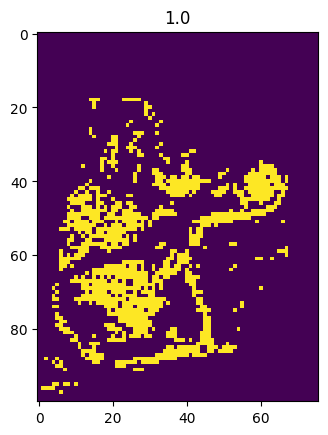

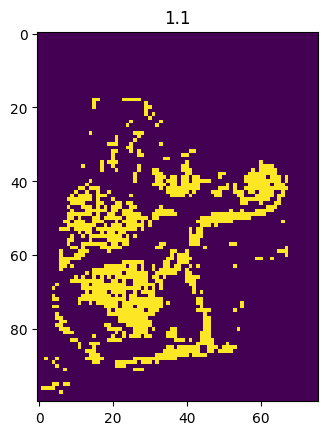

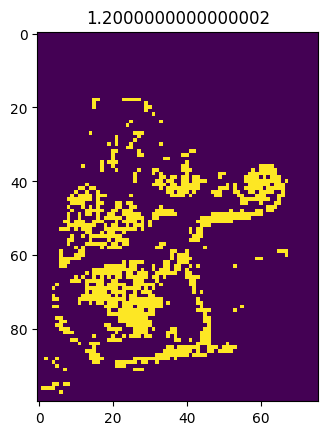

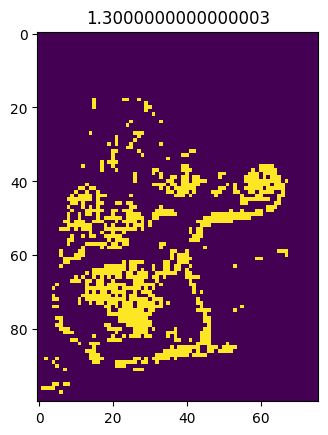

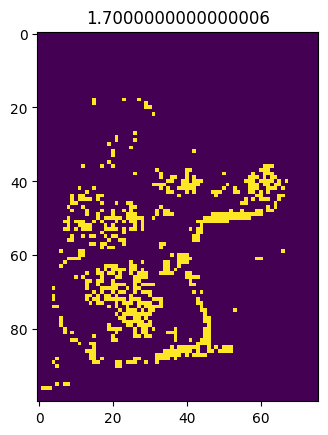

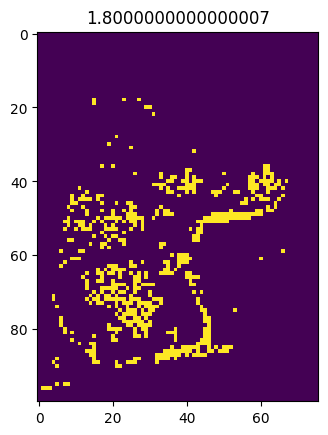

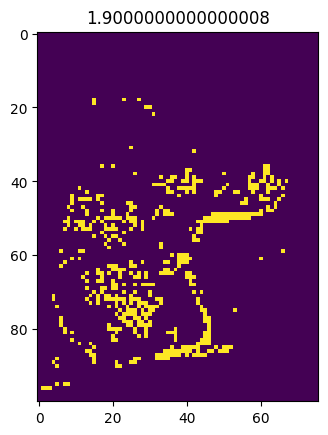

In [304]:
img = mushroom.dtype_to_spore['xenium'].true_pixels[4]
# for gene_set in keep:
genes = ['PTPRC']
x = img[..., [i for i, g in enumerate(df.columns) if g in genes]]
x = x.mean(-1)

for i in np.arange(1, 2, .1):
    m = x > i
    plt.imshow(m)
    plt.title(i)
    plt.show()

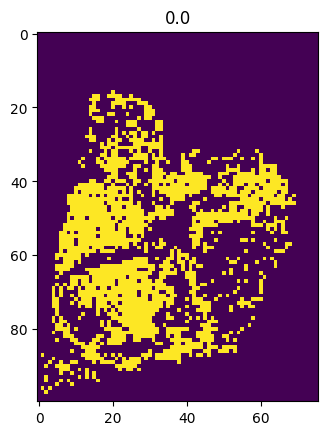

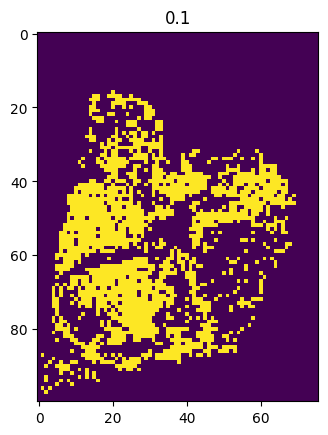

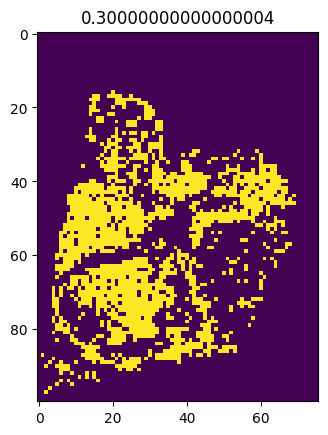

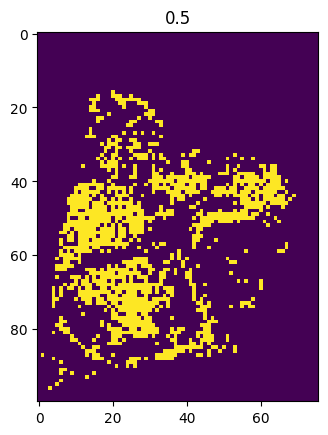

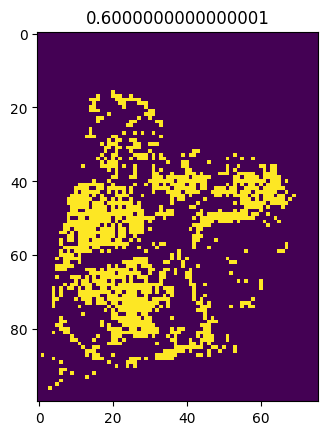

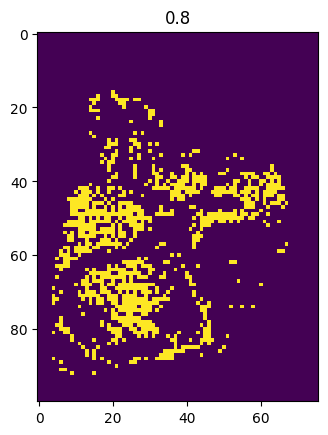

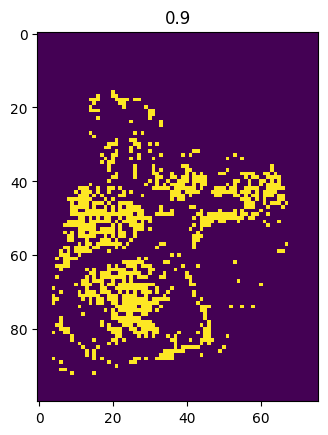

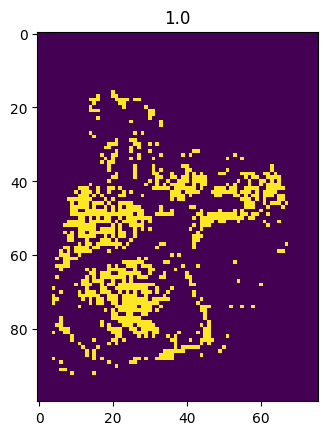

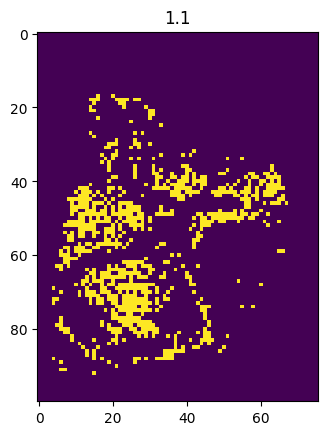

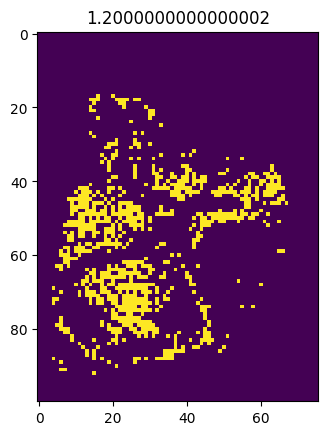

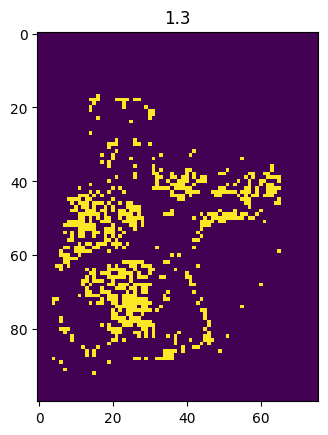

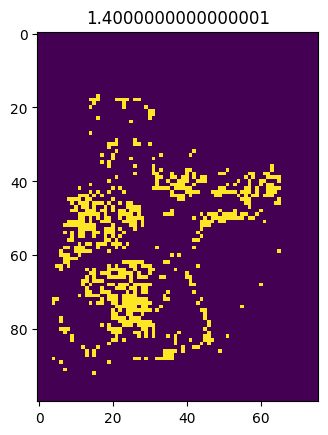

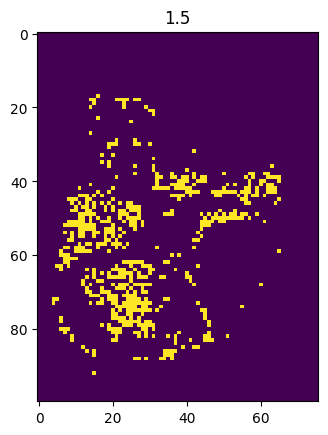

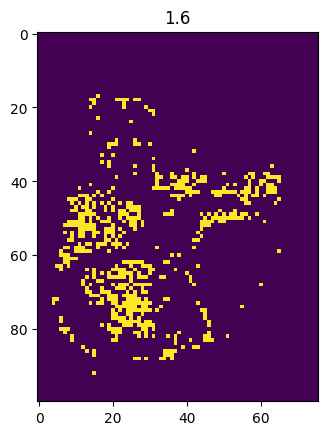

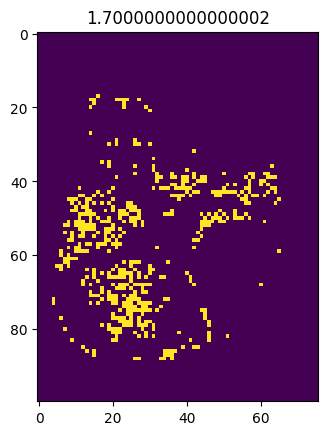

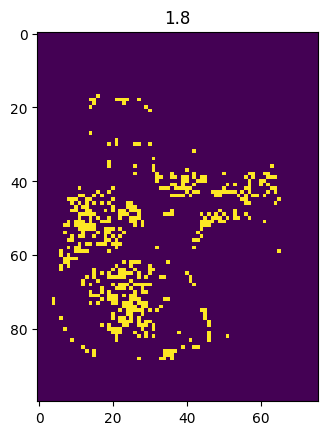

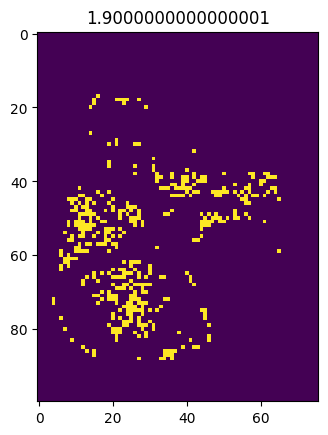

In [313]:
img = mushroom.dtype_to_spore['xenium'].true_pixels[4]
# for gene_set in keep:
genes = ['HLA-DQB2']
x = img[..., [i for i, g in enumerate(df.columns) if g in genes]]
x = x.mean(-1)

for i in np.arange(0, 2, .1):
    m = x > i
    plt.imshow(m)
    plt.title(i)
    plt.show()

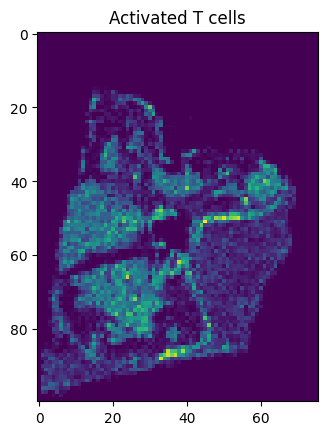

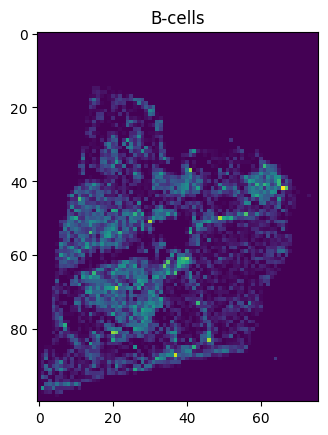

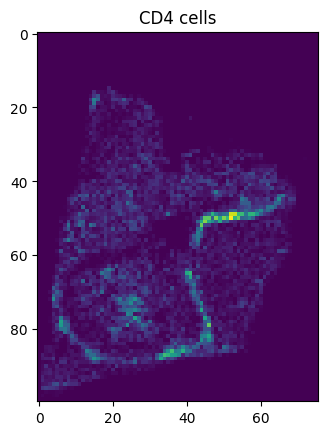

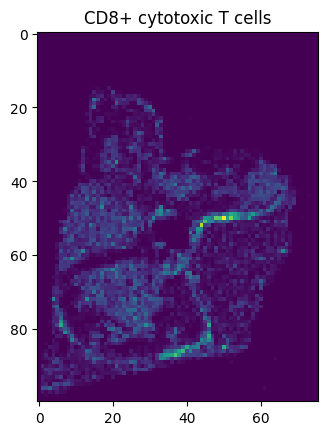

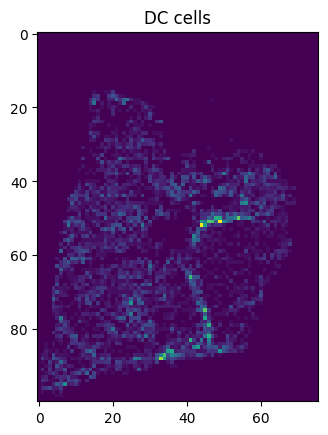

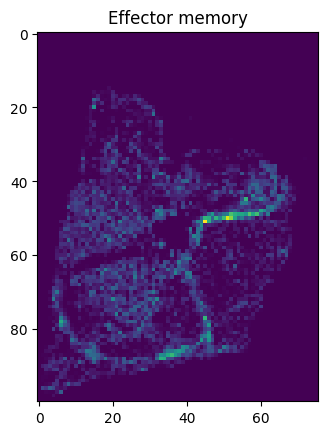

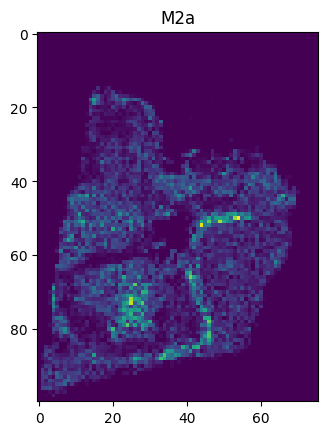

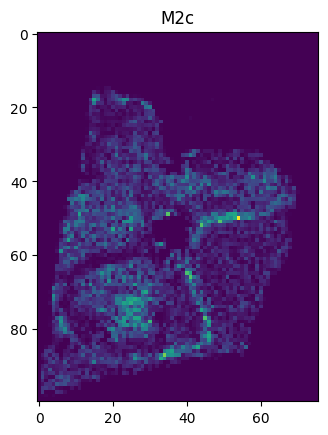

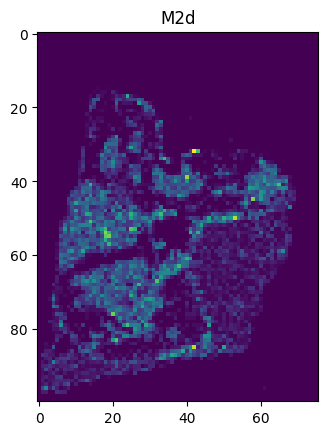

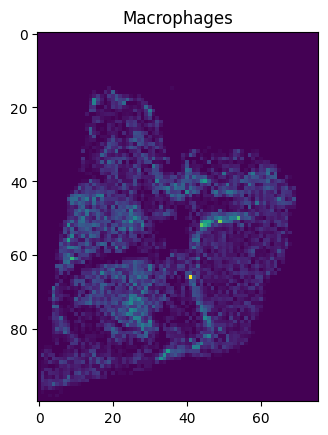

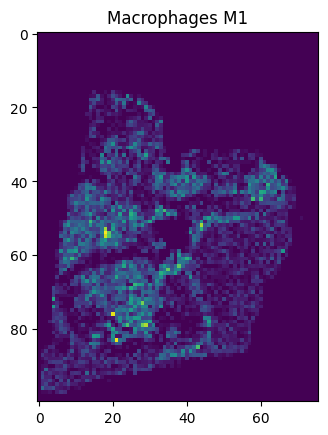

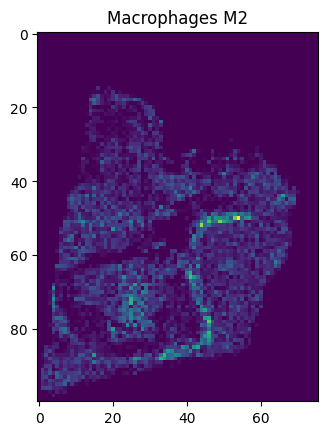

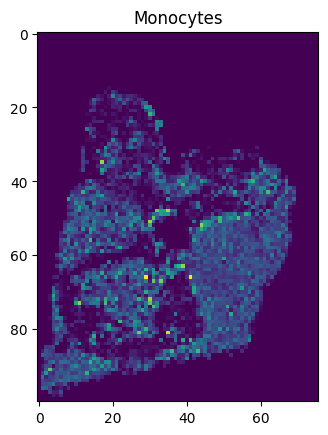

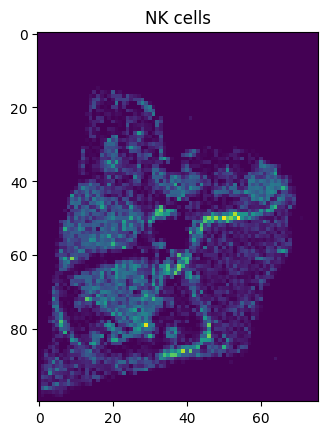

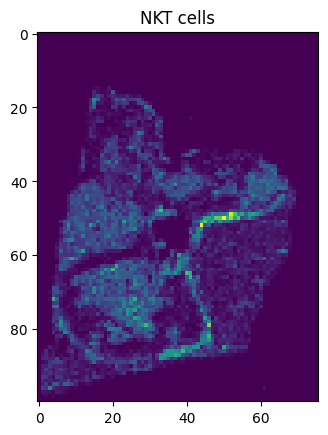

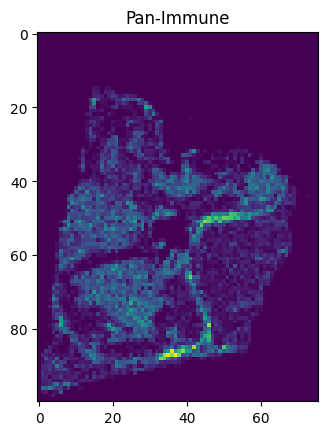

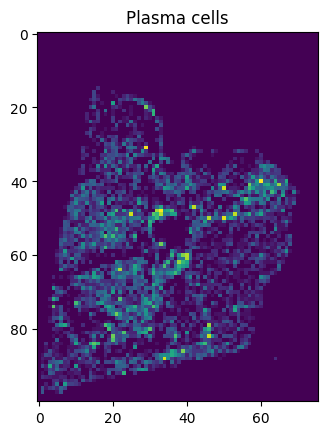

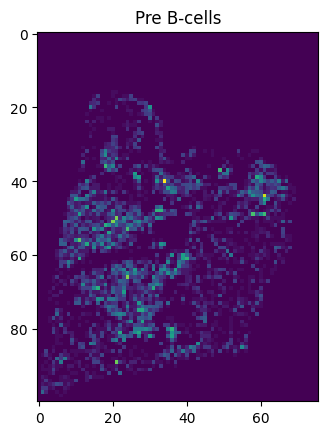

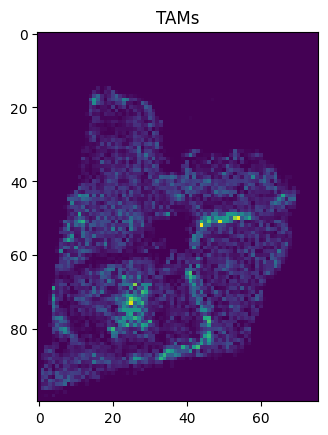

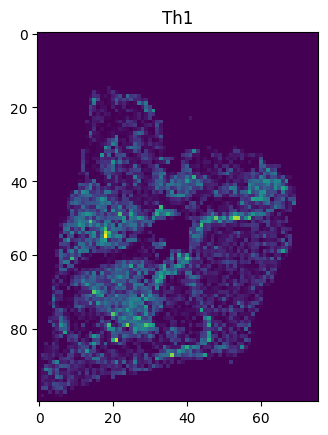

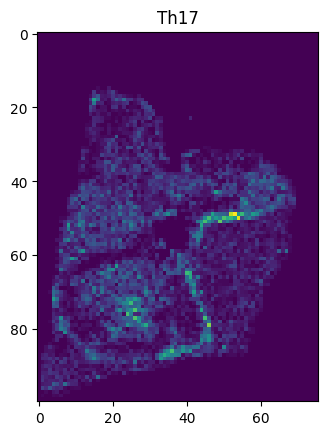

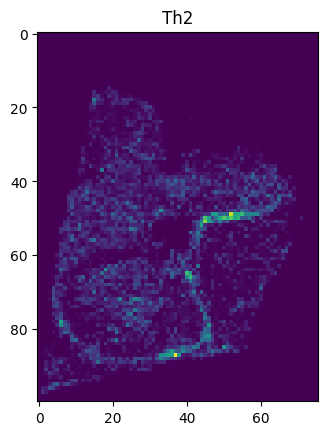

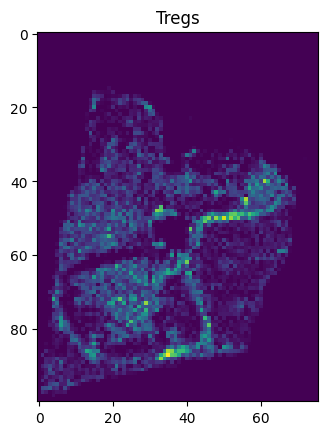

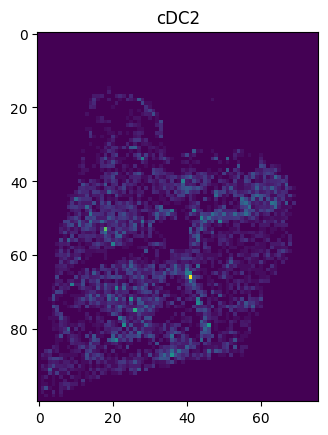

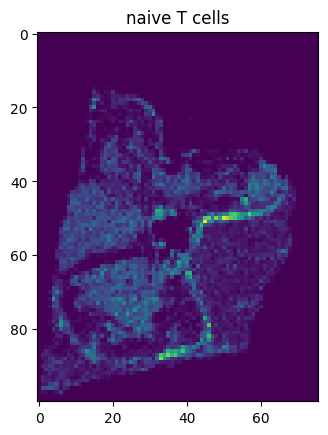

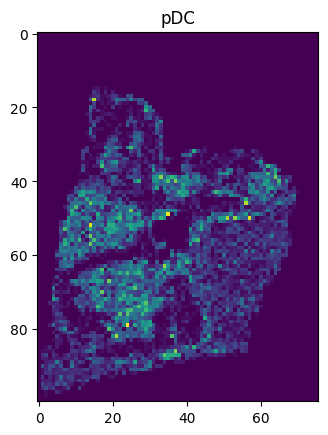

In [297]:
img = mushroom.dtype_to_spore['xenium'].true_pixels[4]
for gene_set in keep:
    genes = sorted(set(alla_df[alla_df['Gene_set']==gene_set]['Gene'].to_list()))
    x = img[..., [i for i, g in enumerate(df.columns) if g in genes]]
    if x.shape[-1] > 0:
        x = x.mean(-1)
        plt.imshow(x)
        plt.title(gene_set)
        plt.show()

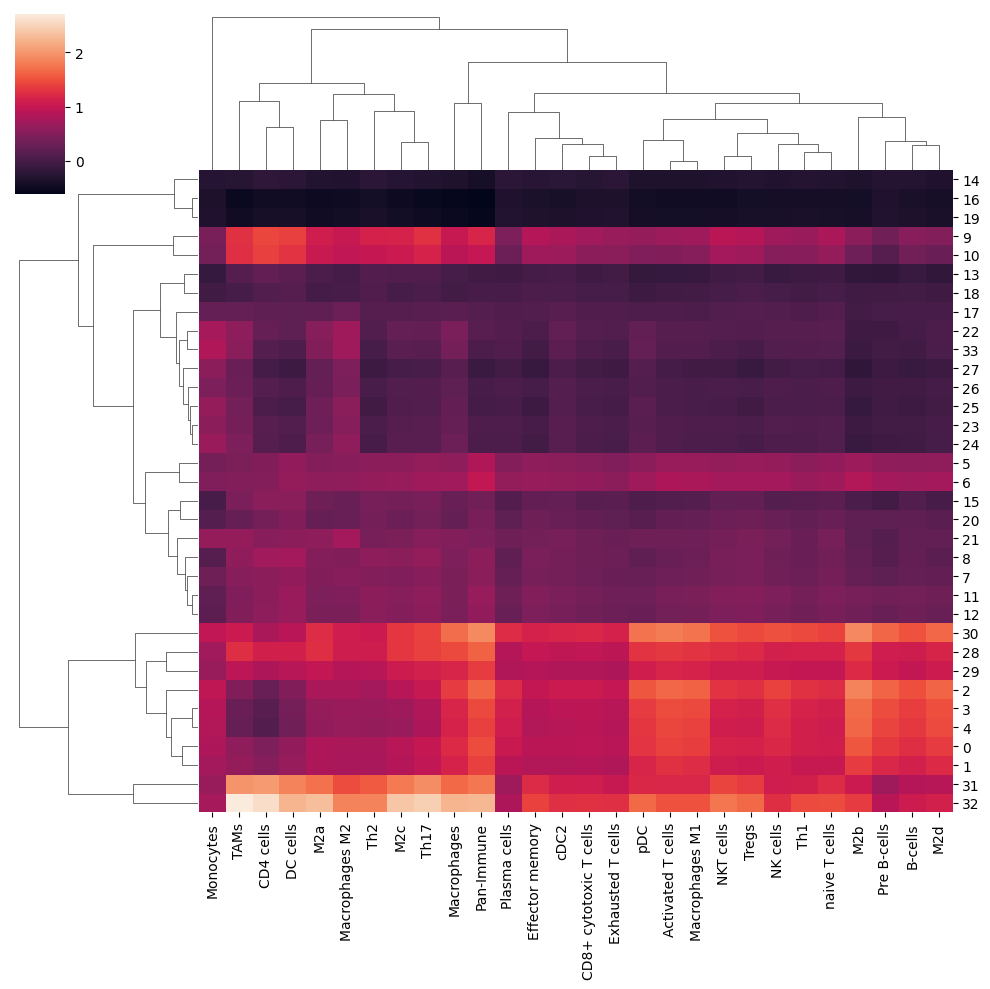

In [299]:
sns.clustermap(score_df.T)

In [186]:
metadata

{'resolution': 1.0,
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s0_HT413C1-Th1k4A1-U14_he.tif'}],
   'position': 0,
   'sid': 'HT413C1-Th1k4A1-U14'},
  {'data': [{'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s1_HT413C1-Th1k4A1-U18_he.tif'}],
   'position': 20,
   'sid': 'HT413C1-Th1k4A1-U18'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s2_HT413C1-Th1k4A1-U19_xenium.h5ad'}],
   'position': 25,
   'sid': 'HT413C1-Th1k4A1-U19'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registered/s3_HT413C1-Th1k4A1-U20_multiplex.ome.tiff'}],
   'position': 30,
   'sid': 'HT413C1-Th1k4A1-U20'},
  {'data': [{'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/submission_v1/

In [238]:
for entry in metadata['sections']:
    print(entry['position'], entry['data'][0]['dtype'])

0 he
20 he
25 xenium
30 multiplex
45 he
50 xenium
55 multiplex
60 he
75 cosmx
80 he
85 xenium
95 he
100 he
115 he
120 xenium
125 multiplex
130 he
140 he
145 he
150 xenium
155 multiplex
165 cosmx
170 he
175 xenium
180 multiplex
185 he
195 he
200 multiplex
205 multiplex
